# Final Project
## Exploring the pandemic's impact on the city:
#### How the lockdown has affected crime and transit
**by Jeff Scanlon and Daniel Schnelback**

# Motivation
Life has changed since the onset of Covid-19 in the United States. Some of these changes we can easily observe just by walking through the city: buses are empty, there is less traffic. We were interested in being able to quantify these changes, and to drill down to find trends that may be less obvious. We decided to explore crime data and transit data to learn if there are any nuances or suprises in this data.

# Findings

1. **Crime**
    - The overall crime rate has decreased by nearly 20% since the onset of the pandemic.
    - Public drunkenness and DUI rates decreased in correlation with restrictions on alcohol sales caused by the pandemic.
    - While there doesn't appear to be significant change in total assault or harassment rates, specific types of assualt and harrasment offenses saw profound increases. Rising domestic violence may be contributing to this increase.

2. **Biking**
    - Stations that appear to predominantly serve commuters have less demand, while others have seen year-on-year increases. 
    - Healthy ride could drill down into their own data and formalize their own definitions for such categories if they do not already do so
    - Next areas to explore could include trip duration (also maybe indicative of recreational trips if rising relative to commuting) and connecting FROM-TO stations to see if explicit paths have become noticeably more prevalent during lockdown times (e.g., trip connecting downtown stations may be down due to less commuting, but trips between trail stations or from one neighborhood to another). 
    
3. **Buses**
    - The most heavily used routes are in commuter hubs (e.g., the busways) and their ridership is still well-below baseline, confirming our initial hypothesis. 
    - Certain routes showed inelastic demand - the port authority should drill down into these to see what routes are going to be used regardless of case uptick. Are there ways to ensure their safety, especially?
    - Next areas to explore would do more to connect changes in ridership with data about the riders themselves (general or inferred demographics). 

# Imports

In [ ]:
import pandas as pd
from plotnine import *

# Arrest Data

The data we are exploring is spread across many tables, which are all made avialable to the public via the **Western Pennsylvania Regional Data Center**. URL links to each of these data source are provided below.

https://data.wprdc.org/dataset/uniform-crime-reporting-data

*The Western Pennsylvania Regional Data Center is managed by the University of Pittsburgh’s Center for Social and Urban Research. While we do not have particular instances of projects using this data, it is certainly drawn upon by researchers and local governmental, private, and other entities.*

**Police Blotter Arrest Data:** The data in this table cover a time period from 2005 to Sep 2020, although most of the data is from 2016 onward. The data details each arrest, as well as the offense type (or types) for each arrest, the location of the arrest with latitude and longitude, the arrest neighborhood, and more.

**Recommendations:**
    We recommend further analysis on domestic abuse and violence data. This could be useful for allocating support and resources to at-risk communities in the fall and winter of 2020, when Covid-19 cases are expected to surge.
    
Basic findings:
- The overall crime rate has decreased by nearly 20% since the onset of the pandemic.
- Public drunkenness and DUI rates decreased in correlation with restrictions on alcohol sales caused by the pandemic.
- While there doesn't appear to be significant change in total assault or harassment rates, specific types of assualt and harrasment offenses saw profound increases. Rising domestic violence may be contributing to this increase.

# Cleaning

In [ ]:
arrests_all = pd.read_csv('pgh_crime_blotter.csv')
arrests = arrests_all

#Setting time windows for pre_covid and during_covid for year-on-year analysis.
arrests.loc[(arrests['Date'] >= '2019-03-01') & (arrests['Date'] < '2019-09-01'), 'Time_Period'] = 'Pre_Covid'
arrests.loc[(arrests['Date'] >= '2020-03-01') & (arrests['Date'] < '2020-09-01'), 'Time_Period'] = 'During_Covid'
arrests.loc[(arrests['Date'] < '2019-03-01') | ((arrests['Date'] >= '2019-10-01') & (arrests['Date'] < '2020-03-01')) | (arrests['Date'] >= '2020-10-01'), 'Time_Period'] = 0

FileNotFoundError: ignored

# Hypothesis 1: We hypothesize that overall crime rates will decrease during the Covid-19 pandemic.
We know that other major cities around the U.S. have reported findings like this, and it makes sense: with more people in their homes, interactions are limited and opportunities for crime are reduced.

## Overall Changes in Arrests
#### Arrests seem to be down a lot! Down nearly 32% from Mar-Sep of 2020 comapred to same time range last year.

In [ ]:
a = len(arrests[arrests['Time_Period'] == 'Pre_Covid'])
b = len(arrests[arrests['Time_Period'] == 'During_Covid'])
print("# of arrests pre-covid:", a)
print("# of arrests during-covid:", b)
print("Change in number of arrests:", b - a)
Perc_Change = str(round(((((b - a)/a))*100),2))
print("Percent change in number of arrests:", Perc_Change + "%")
Perc_Comp = str(round(((b/a)*100),2))
print("Pandemic arrests as percentage of pre-pandemic arrests:", Perc_Comp + "%")

# of arrests pre-covid: 20288
# of arrests during-covid: 16370
Change in number of arrests: -3918
Percent change in number of arrests: -19.31%
Pandemic arrests as percentage of pre-pandemic arrests: 80.69%


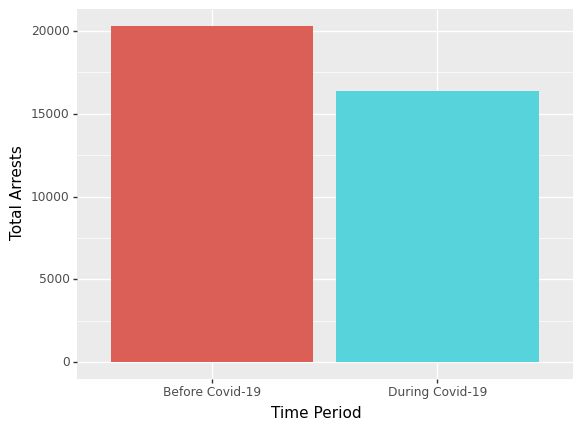

<ggplot: (164332554599)>

In [ ]:
summary = (('Before Covid-19', a), ('During Covid-19', b))
summary_df = pd.DataFrame(summary)
summary_df['Time Period'] = summary_df[0]
summary_df['Total Arrests'] = summary_df[1]
ggplot(summary_df, aes(x='Time Period', y='Total Arrests', fill='Time Period')) + geom_bar(stat='identity')\
+ theme(legend_position='none')

### Total Crime over Time

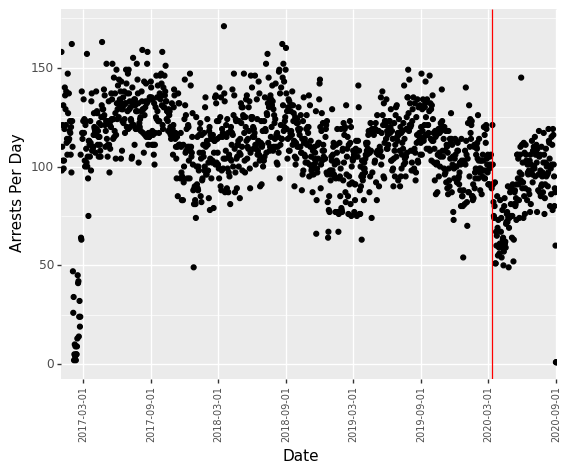

<ggplot: (164331838245)>

In [ ]:
arrests_17 = arrests_all[(arrests_all['Year'] > 2016)]
c_counts = arrests_17['Date'].value_counts()
c_17 = pd.DataFrame()
c_17['Arrests Per Day'] = c_counts.values
c_17['Date'] = c_counts.index


ggplot(c_17, aes(x='Date', y='Arrests Per Day')) + geom_point()\
+ theme(axis_text_x=element_text(angle=90, size=7)) + scale_x_discrete(breaks=(
    '2017-03-01', '2017-09-01', '2018-03-01','2018-09-01', '2019-03-01', '2019-09-01', '2020-03-01', '2020-09-01'))\
+ geom_vline(xintercept = 1167, color='red')

The crime data has seasonality. It tends to increase in the spring and summer and decrease in the fall and winter. Thus, we ought to perform year-on-year comparisons for our analysis rather than simply month-to-month comparisons. Likewise, the onset of the pandemic (red line), corresponds to a sudden drop in arrests.

# Cleaning for Year-on-Year Comparsion of Counts

In [ ]:
Pre_df = arrests[(arrests['Time_Period']=='Pre_Covid')]
Pre_df = Pre_df['INCIDENTHIERARCHYDESC'].value_counts()
Pre_df = pd.DataFrame(Pre_df)
Pre_df['Hierarchy'] = Pre_df.index
Pre_df = Pre_df.reset_index(drop=True)

Dur_df = arrests[(arrests['Time_Period']=='During_Covid')]
Dur_df = Dur_df['INCIDENTHIERARCHYDESC'].value_counts()
Dur_df = pd.DataFrame(Dur_df)
Dur_df['Hierarchy'] = Dur_df.index
Dur_df = Dur_df.reset_index(drop=True)

In [ ]:
compare = pd.merge(Pre_df, Dur_df, on='Hierarchy')
compare['Abs_Diff'] = compare['INCIDENTHIERARCHYDESC_x'] - compare['INCIDENTHIERARCHYDESC_y']
compare['Perc_Diff'] = compare['Abs_Diff']/compare['INCIDENTHIERARCHYDESC_x']

# Which offense types were most common in 2019? And how did they fare in 2020?

Here are the 10 offense groups that had the most arrests from Mar - Sep of 2019, and their corresponding changes (increase or decrease) during the pandemic.

Most of these major groups are down by a large margin (down by more than 10%).

The only in these top 10 that has increased singificantly is related to Harrassment.

In [ ]:
compare[0:10]

,INCIDENTHIERARCHYDESC_x,Hierarchy,INCIDENTHIERARCHYDESC_y,Abs_Diff,Perc_Diff
0,1072,THEFT FROM AUTO,647,425,0.396455
1,944,THEFT/ALL OTHERS,744,200,0.211864
2,851,SIMPLE ASSAULT/INJURY,649,202,0.237368
3,644,CRIMINAL MISCHIEF (AUTO),487,157,0.243789
4,551,RETAIL THEFT (SHOPLIFTING),339,212,0.384755
5,534,HARRASSMENT/THREAT/ATTEMPT/PHY,364,170,0.318352
6,477,CRIMINAL MISCHIEF,501,-24,-0.050314
7,383,MARIJUANA-POSSESS,257,126,0.328982
8,376,HARRASSMENT-OTHER,510,-134,-0.356383
9,364,ALL OTHER OFFENSES(EXPT TRAFF),184,180,0.494505


# Which offenses saw the greatest absolute difference from 2019 to 2020?

Here are the top 10 offense categories based on the absolute difference between Before and During Covid-19.
Most of the offenses that were leading to the most arrests in 2019 are the same offenses that saw the greatest absolute reduction. This makes sense.

We can compare this to percentage reduction as well, by sorting on "Perc_Diff" instead of "Abs_Diff".
- Retail theft moved up on the list, signifing a big reduction.
- Public drunkenness moved *way* up on the list, signifying it had a very big reduction!

In [ ]:
compare.sort_values(by='Abs_Diff', ascending=False)[0:10]

,INCIDENTHIERARCHYDESC_x,Hierarchy,INCIDENTHIERARCHYDESC_y,Abs_Diff,Perc_Diff
0,1072,THEFT FROM AUTO,647,425,0.396455
4,551,RETAIL THEFT (SHOPLIFTING),339,212,0.384755
2,851,SIMPLE ASSAULT/INJURY,649,202,0.237368
10,343,PUBLIC DRUNKENESS,142,201,0.586006
1,944,THEFT/ALL OTHERS,744,200,0.211864
9,364,ALL OTHER OFFENSES(EXPT TRAFF),184,180,0.494505
5,534,HARRASSMENT/THREAT/ATTEMPT/PHY,364,170,0.318352
3,644,CRIMINAL MISCHIEF (AUTO),487,157,0.243789
7,383,MARIJUANA-POSSESS,257,126,0.328982
24,157,THEFT FROM BUILDING,54,103,0.656051


# Should we do a cross-neighborhood comparative analysis?
While we originally considered the idea of doing a comparing crime rates across different neighborhoods, there are a lot of neighborhoods in Pittsburgh and thus a lot in the dataset! This became problematic because when dividing all of the arrests that occured during the pandemic months in each of the neighborhoods, the sample sizes within each neighborhood became very small! This small sampling makes it more difficult to distill meaningful findings, so we ultimately decided neighborhood would not be the best geographic feature to analyze across. However, this is certainly something that can be considered for future work. We recommend using census Block Groups, which we believe would be larger than most neighborhoods.

### By Neighborhood

In [ ]:
neigh = arrests.groupby(['Time_Period', 'INCIDENTNEIGHBORHOOD'])
neigh = neigh['INCIDENTHIERARCHYDESC'].value_counts()
neigh = pd.DataFrame(neigh)
neigh

INCIDENTHIERARCHYDESC
Time_Period INCIDENTNEIGHBORHOOD INCIDENTHIERARCHYDESC                              
0           Allegheny Center     THEFT FROM AUTO                                 158
                                 THEFT/ALL OTHERS                                 82
                                 SIMPLE ASSAULT/INJURY                            77
                                 CRIMINAL MISCHIEF (AUTO)                         72
                                 DRUG PARAPHERNALIA                               70
...                                                                              ...
Pre_Covid   Windgap              PROTECTIVE ORDERS                                 1
                                 SCATTERING RUBBISH                                1
                                 SIMPLE ASSAULT/INJURY                             1
                                 TERRORISTIC THREATS                               1
                                 THEFT M.V. PARTS,ACCESSORIES                      1

[15540 rows x 1 columns]

# Year-on-Year changes

In [ ]:
import calendar
arrests['Date'] = pd.to_datetime(arrests['Date'])
mnth_yr = arrests['Date'].groupby([arrests.Date.dt.year, arrests.Date.dt.month]).agg('count')
new_df = pd.DataFrame(mnth_yr.iloc[58:114])
new_df['Year'] = [i[0] for i in new_df.index]
new_df['Month'] = [i[1] for i in new_df.index]
new_df.reset_index(drop=True, inplace=True)
new_df.rename(columns={'Date':'Count'}, inplace=True)
new_df['MonthName'] = new_df['Month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
#Means
means_df = new_df[new_df['Year'] != 2020]
means_df = means_df.groupby('Month').mean()
mean_list = list(means_df['Count'])[0:9]


df2020 = new_df[new_df['Year'] == 2020]
list2020 = list(df2020['Count'])

means_diff = zip(mean_list, list2020)
change_df = pd.DataFrame(list(means_diff))
change_df['Change'] = change_df[1] - change_df[0]
change_df['PercentChange'] = round(((change_df['Change']/change_df[0])*100),2)

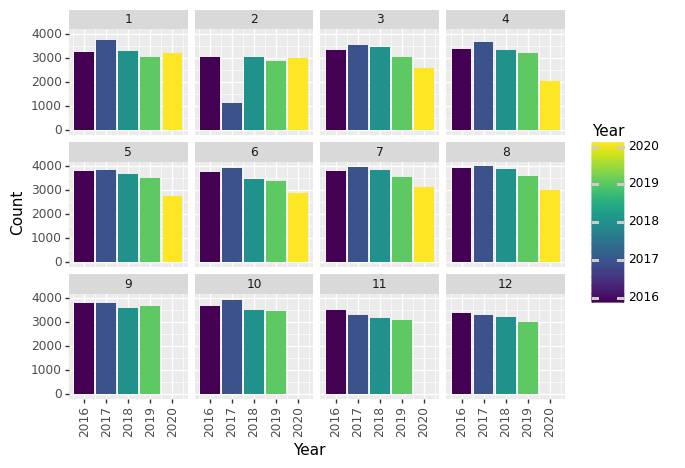

<ggplot: (164332867232)>

In [ ]:
ggplot(new_df, aes(x='Year', y='Count', fill='Year')) + geom_bar(stat='identity')\
+ facet_wrap('Month') + theme(axis_text_x = element_text(angle=90))

Breaking the data down this way reveals tremendous consistency for the same month across many different years. The only exception is Febraury of 2017, which seems to be an outlier for some reason. Perhaps there was an error or inconsistency in the data reporting. This analysis shows that while January and February of 2020 were extremely close to historical trends, March and several of the months that follow begin to diverge from these trends! This is exactly what we were expecting to see!

## Let's look for trends in the most common arrest categories.

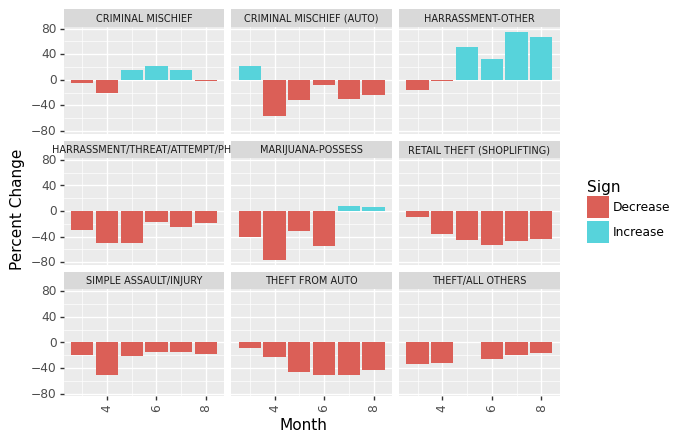

<ggplot: (164331156047)>

In [ ]:
import numpy as np
highest9 = compare['Hierarchy'][0:9]
highest9 = arrests[(arrests['Time_Period'] != 0) & (arrests['INCIDENTHIERARCHYDESC'].isin(highest9))]
highest9 = highest9.groupby(['Year', 'Month', 'INCIDENTHIERARCHYDESC']).size()
highest9_df = highest9.to_frame(name = 'Arrest Count').reset_index()
highest9_df['Date'] = pd.to_datetime(highest9_df[['Year', 'Month']].assign(DAY=15))

ggplot(highest9_df, aes(x='Date', y='Arrest Count', fill='Year')) + geom_bar(stat='identity')\
+ theme(strip_text = element_text(size=7), axis_text_x=element_text(angle=90, size=7)) \
+ facet_wrap('INCIDENTHIERARCHYDESC')

highest9_19 = list(highest9_df[highest9_df['Year']==2019]['Arrest Count'])
cats = list(highest9_df[highest9_df['Year']==2019]['INCIDENTHIERARCHYDESC'])
dates = list(highest9_df['Date'].dt.month)
highest9_20 = list(highest9_df[highest9_df['Year']==2020]['Arrest Count'])

change_diff2 = zip(dates, cats, highest9_19, highest9_20)
change_diff2 = pd.DataFrame(change_diff2)
change_diff2['Change'] = change_diff2[3] - change_diff2[2]
change_diff2['Percent Change'] = round(((change_diff2['Change']/change_diff2[2])*100),2)
change_diff2['Sign'] = np.where(change_diff2['Change'] >= 0,   'Increase', 'Decrease')
change_diff2.rename(columns={0:'Month', 1:'Hierarchy'}, inplace=True)

ggplot(change_diff2, aes(x='Month', y='Percent Change', fill='Sign')) + geom_bar(stat='identity')\
+ facet_wrap('Hierarchy') + theme(strip_text = element_text(size=7), axis_text_x = element_text(angle=90))

We already knew that this 'Harassment-Other' category saw profound increases during the pandemic. (This was shown in an earlier table.) However, this grid helps to visualize the trend for each month of the pandemic, and to compare trends across the most common offense types. We recommend that the Pittsburgh Police do some more research to try to identify what could be driving this increase. For example, they should start by asking what, specifically, each of these offenses had in common and why they were coded as "Harassment-Other." This might help them discover why these arrests are increasing so much.

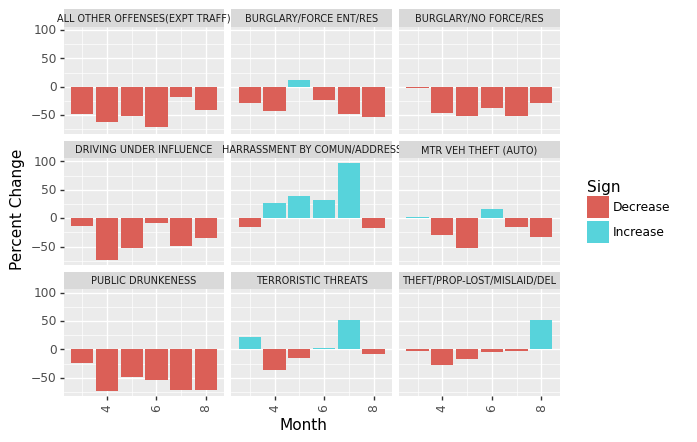

<ggplot: (164344035103)>

In [ ]:
next9 = compare['Hierarchy'][9:18]
next9 = arrests[(arrests['Time_Period'] != 0) & (arrests['INCIDENTHIERARCHYDESC'].isin(next9))]
next9 = next9.groupby(['Year', 'Month', 'INCIDENTHIERARCHYDESC']).size()
next9_df = next9.to_frame(name = 'Arrest Count').reset_index()
next9_df['Date'] = pd.to_datetime(next9_df[['Year', 'Month']].assign(DAY=15))

ggplot(next9_df, aes(x='Date', y='Arrest Count', fill='Year')) + geom_bar(stat='identity')\
+ theme(strip_text = element_text(size=7), axis_text_x=element_text(angle=90, size=7)) \
+ facet_wrap('INCIDENTHIERARCHYDESC')

next9_19 = list(next9_df[next9_df['Year']==2019]['Arrest Count'])
cats = list(next9_df[next9_df['Year']==2019]['INCIDENTHIERARCHYDESC'])
dates = list(next9_df['Date'].dt.month)
next9_20 = list(next9_df[next9_df['Year']==2020]['Arrest Count'])

change_diff3 = zip(dates, cats, next9_19, next9_20)
change_diff3 = pd.DataFrame(change_diff3)
change_diff3['Change'] = change_diff3[3] - change_diff3[2]
change_diff3['Percent Change'] = round(((change_diff3['Change']/change_diff3[2])*100),2)
change_diff3['Sign'] = np.where(change_diff3['Change'] >= 0,   'Increase', 'Decrease')
change_diff3.rename(columns={0:'Month', 1:'Hierarchy'}, inplace=True)

ggplot(change_diff3, aes(x='Month', y='Percent Change', fill='Sign')) + geom_bar(stat='identity')\
+ facet_wrap('Hierarchy') + theme(strip_text = element_text(size=7), axis_text_x = element_text(angle=90))

These are the next most common offense categories. Again, a specific form of harassment is the only one to show very profound increases! The recommendation, then, is the same as before. The Pittsburgh Police should investigate this trend further. One idea is that the increased protest and riots this summer have led to more arrests, and perhaps many of these arrests have been for forms of harassment.

# Creating a new variable

In [ ]:
conditions = [
    (arrests['HIERARCHY'] == 1),
    (arrests['HIERARCHY'] == 2),
    (arrests['HIERARCHY'] == 3),
    (arrests['HIERARCHY'] == 4),
    (arrests['HIERARCHY'] == 5),
    (arrests['HIERARCHY'] == 6),
    (arrests['HIERARCHY'] == 7),
    (arrests['HIERARCHY'] == 8),
    ]

# create a list of the values we want to assign for each condition
values = ['murder', 'rape', 'robbery', 'assault', 'burglary', 'theft', 'motor vehicle theft', 'arson' ]

# create a new column and use np.select to assign values to it using our lists as arguments
arrests['Offense'] = np.select(conditions, values)

# display updated DataFrame
arrests.head();

# Comparing the most serious offenses: Murder and Rape

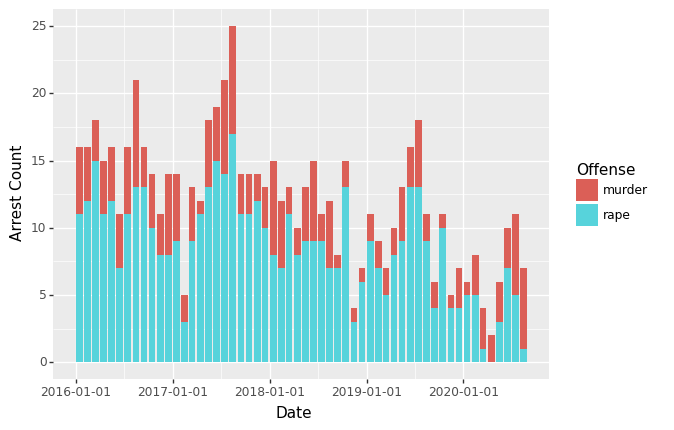

<ggplot: (164337470070)>

In [ ]:
c_values1 = ['murder', 'rape']
serio_arr = arrests[(arrests['Offense'].isin(c_values1)) & (arrests['Year'] >= 2016)]
serio_arr = serio_arr.groupby(['Offense', 'Year', 'Month']).size()
serio_arr = serio_arr.to_frame(name = 'Arrest Count').reset_index()
serio_arr['Date'] = pd.to_datetime(serio_arr[['Year', 'Month']].assign(DAY=15))
serio_arr['Offense'] = serio_arr['Offense'].apply(str)

ggplot(serio_arr, aes(x='Date', y='Arrest Count', fill='Offense')) + geom_bar(stat='identity')

Unsurprisingly, these offenses have pretty low counts to begin with. Because they are so serious, we expect and hope that they occur at low rates. From a data perspective, this makes them somewhat more difficult to analyze. Here, these offense have been grouped by month because had they been treated as they were (by each individual day) the data would have been too sparse to visualize effectively. While rape seems to have decreased since the onset of the pandemic, there doesn't seem to be a significant change in murder.

# What about other serious crime?

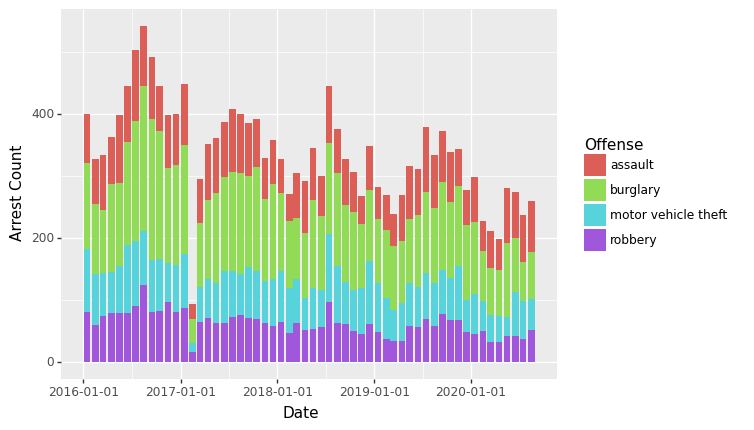

<ggplot: (164331973798)>

In [ ]:
c_values2 = ['robbery', 'assault', 'burglary', 'motor vehicle theft']
serio_arr = arrests[(arrests['Offense'].isin(c_values2)) & (arrests['Year'] >= 2016)]
serio_arr = serio_arr.groupby(['Offense', 'Year', 'Month']).size()
serio_arr = serio_arr.to_frame(name = 'Arrest Count').reset_index()
serio_arr['Date'] = pd.to_datetime(serio_arr[['Year', 'Month']].assign(DAY=15))
serio_arr['Offense'] = serio_arr['Offense'].apply(str)

ggplot(serio_arr, aes(x='Date', y='Arrest Count', fill='Offense')) + geom_bar(stat='identity')

Most of the other serious crime also seems to be down (somewhat) since the onset of the pandemic. Robbery, motor vehicle theft, and burglary seem to be somewhat down (especially when comparing March - August of 2020 with March - August of 2019). However, assault seems to remain unchanged. This could be evidence that victims of domestic violence continue to be at risk (or increased risk) during the lockdowns and stay-at-home orders of the pandemic.

# What about theft?

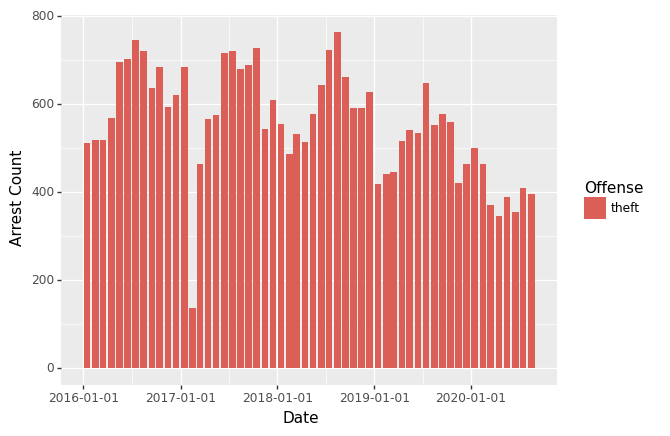

<ggplot: (164332864555)>

In [ ]:
c_values3 = ['theft']
serio_arr = arrests[(arrests['Offense'].isin(c_values3)) & (arrests['Year'] >= 2016)]
serio_arr = serio_arr.groupby(['Offense', 'Year', 'Month']).size()
serio_arr = serio_arr.to_frame(name = 'Arrest Count').reset_index()
serio_arr['Date'] = pd.to_datetime(serio_arr[['Year', 'Month']].assign(DAY=15))
serio_arr['Offense'] = serio_arr['Offense'].apply(str)

ggplot(serio_arr, aes(x='Date', y='Arrest Count', fill='Offense')) + geom_bar(stat='identity')

The Uniform Crime Reporting hierarchy lists theft as one of the least severe forms of crime. Thus, we expect to see large counts of theft, as we do in this data. We graphed it separately (as opposed to with other offense categories) so as not to skew the y-axis and render the other offenses impossible to read. Like much of the data, there seems to be gradual reductions in the offense over time, with ebbs and flows during specific seasons. It does appear that there is a reduction from March - June, especially given that this is normally a time period when we would expect these rates to be increasing rather than decreasing.

# Hypothesis 2: We hypothesize that public drunkenness and DUIs will have decreased because of restrictions on alcohol sales.

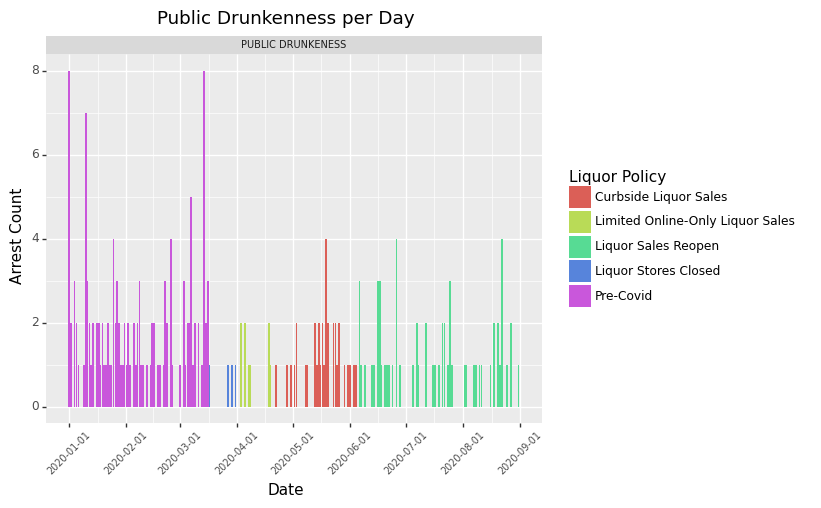

<ggplot: (164331980647)>

In [ ]:
hypo_df = arrests[(arrests['INCIDENTHIERARCHYDESC']=='PUBLIC DRUNKENESS')]
hypo_df = hypo_df[(hypo_df['Year'] >= 2020)]
hypo_df = hypo_df.groupby(['Year', 'Month', 'Day', 'INCIDENTHIERARCHYDESC']).size()
hypo_df = hypo_df.to_frame(name = 'Arrest Count').reset_index()
hypo_df['Date'] = pd.to_datetime(hypo_df[['Year', 'Month', 'Day']])

conditions2 = [
    (hypo_df['Date'] < '2020-03-17'),
    ((hypo_df['Date'] >= '2020-03-17')&(hypo_df['Date'] < '2020-04-01')),
    ((hypo_df['Date'] >= '2020-04-01')&(hypo_df['Date'] < '2020-04-20')),
    ((hypo_df['Date'] >= '2020-04-20')&(hypo_df['Date'] < '2020-06-05')),
    (hypo_df['Date'] >= '2020-06-05')  
    ]

values2 = ['Pre-Covid', 'Liquor Stores Closed', 'Limited Online-Only Liquor Sales', 'Curbside Liquor Sales', 'Liquor Sales Reopen']

hypo_df['Liquor Policy'] = np.select(conditions2, values2)

ggplot(hypo_df, aes(x='Date', y='Arrest Count', fill='Liquor Policy')) + geom_bar(stat='identity')\
+labs(title="Public Drunkenness per Day") + facet_wrap('INCIDENTHIERARCHYDESC')\
+ theme(strip_text = element_text(size=7), axis_text_x=element_text(angle=45, size=7))

When looking at arrests related to alcohol consumption, we notice steep drop-offs in arrests for public drunkenness when restrictive liquor sale policies take effect. The decrease is most pronounced for liquor store closing, in blue, and online-only liquor sales, olive green. However, even when curbside liquor sales begin and liquor stores reopen, public drunkenness doesn't quite fully return to pre-pandemic levels. This may be due to the fact that people are still not "out and about" as much as they were in pre-pandemic times.

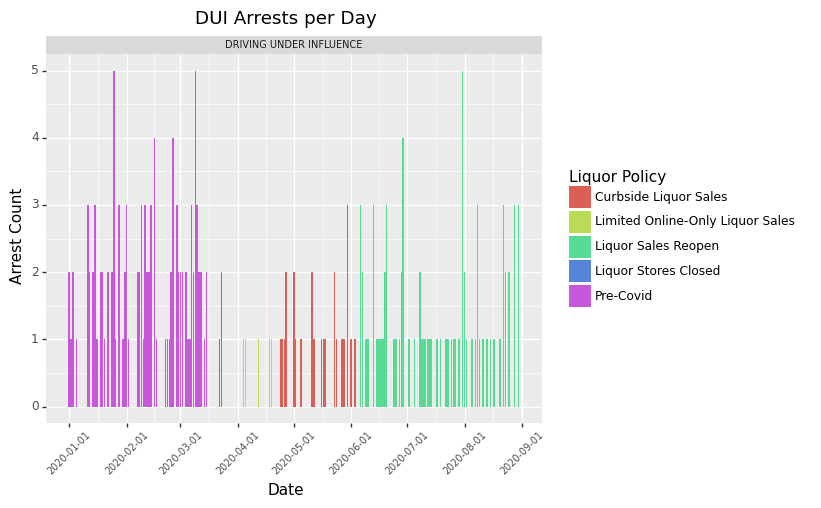

<ggplot: (164340600586)>

In [ ]:
hypo_df = arrests[(arrests['INCIDENTHIERARCHYDESC']=='DRIVING UNDER INFLUENCE')]
hypo_df = hypo_df[(hypo_df['Year'] >= 2020)]
hypo_df = hypo_df.groupby(['Year', 'Month', 'Day', 'INCIDENTHIERARCHYDESC']).size()
hypo_df = hypo_df.to_frame(name = 'Arrest Count').reset_index()
hypo_df['Date'] = pd.to_datetime(hypo_df[['Year', 'Month', 'Day']])

conditions2 = [
    (hypo_df['Date'] < '2020-03-17'),
    ((hypo_df['Date'] >= '2020-03-17')&(hypo_df['Date'] < '2020-04-01')),
    ((hypo_df['Date'] >= '2020-04-01')&(hypo_df['Date'] < '2020-04-20')),
    ((hypo_df['Date'] >= '2020-04-20')&(hypo_df['Date'] < '2020-06-05')),
    (hypo_df['Date'] >= '2020-06-05')  
    ]

values2 = ['Pre-Covid', 'Liquor Stores Closed', 'Limited Online-Only Liquor Sales', 'Curbside Liquor Sales', 'Liquor Sales Reopen']

hypo_df['Liquor Policy'] = np.select(conditions2, values2)

ggplot(hypo_df, aes(x='Date', y='Arrest Count', fill='Liquor Policy')) + geom_bar(stat='identity')\
+labs(title="DUI Arrests per Day") + facet_wrap('INCIDENTHIERARCHYDESC')\
+ theme(strip_text = element_text(size=7), axis_text_x=element_text(angle=45, size=7))

Just like with public drunkenness, we notice steep drop offs in arrests for DUIs when restrictive liquor sale policies take effect. The decrease is most pronounced for liquor store closing, in blue, and online-only liquor sales, olive green. However, unlike public drunkenness, we see DUIs begin to return to pre-pandemic levels during the "Green Phase" of the governor's reopening plan.

# Hypothesis 3: We hypothesize that domestic violence and abuse will increase during the pandemic because vulnerable populations are confined to their homes at greater rates.

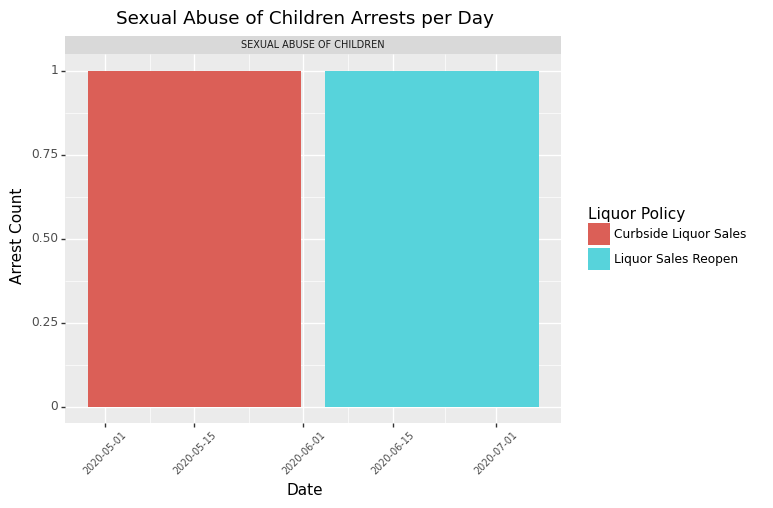

<ggplot: (164331916313)>

In [ ]:
hypo_df = arrests[(arrests['INCIDENTHIERARCHYDESC']=='SEXUAL ABUSE OF CHILDREN')]
hypo_df = hypo_df[(hypo_df['Year'] >= 2020)]
hypo_df = hypo_df.groupby(['Year', 'Month', 'Day', 'INCIDENTHIERARCHYDESC']).size()
hypo_df = hypo_df.to_frame(name = 'Arrest Count').reset_index()
hypo_df['Date'] = pd.to_datetime(hypo_df[['Year', 'Month', 'Day']])

conditions3 = [
    (hypo_df['Date'] < '2020-03-17'),
    ((hypo_df['Date'] >= '2020-03-17')&(hypo_df['Date'] < '2020-04-01')),
    ((hypo_df['Date'] >= '2020-04-01')&(hypo_df['Date'] < '2020-04-20')),
    ((hypo_df['Date'] >= '2020-04-20')&(hypo_df['Date'] < '2020-06-05')),
    (hypo_df['Date'] >= '2020-06-05')  
    ]

values3 = ['Pre-Covid', 'Liquor Stores Closed', 'Limited Online-Only Liquor Sales', 'Curbside Liquor Sales', 'Liquor Sales Reopen']

hypo_df['Liquor Policy'] = np.select(conditions3, values3)

ggplot(hypo_df, aes(x='Date', y='Arrest Count', fill='Liquor Policy')) + geom_bar(stat='identity')\
+labs(title="Sexual Abuse of Children Arrests per Day") + facet_wrap('INCIDENTHIERARCHYDESC')\
+ theme(strip_text = element_text(size=7), axis_text_x=element_text(angle=45, size=7))

Fortunately, sexual abuse of children is one of the rarer offenses. In fact, there were only two instances in 2020. Thus, this data is too sparse for us to perform too much analysis on.

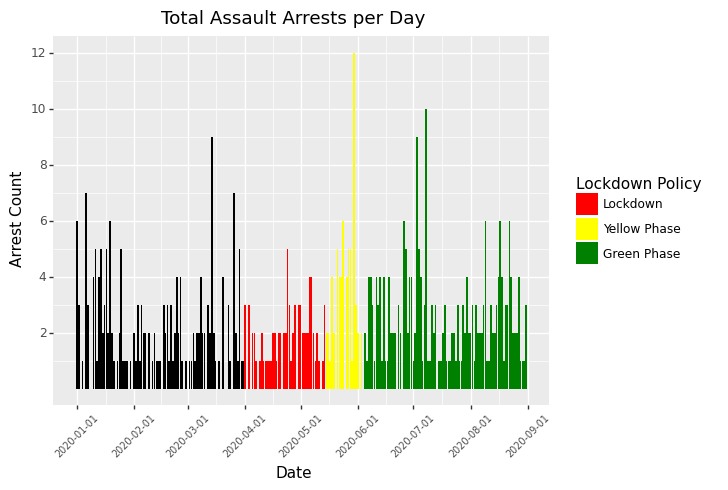

<ggplot: (164342244009)>

In [ ]:
hypo_df = arrests[(arrests['HIERARCHY']==4)]
hypo_df = hypo_df[(hypo_df['Year'] >= 2020)]
hypo_df = hypo_df.groupby(['Year', 'Month', 'Day', 'INCIDENTHIERARCHYDESC']).size()
hypo_df = hypo_df.to_frame(name = 'Arrest Count').reset_index()
hypo_df['Date'] = pd.to_datetime(hypo_df[['Year', 'Month', 'Day']])

conditions4 = [
    (hypo_df['Date'] < '2020-04-01'),
    ((hypo_df['Date'] >= '2020-04-01')&(hypo_df['Date'] < '2020-05-15')),
    ((hypo_df['Date'] >= '2020-05-15')&(hypo_df['Date'] < '2020-06-05')),
    (hypo_df['Date'] >= '2020-06-05')   
]
values4 = ['Pre-Lockdown', 'Lockdown', 'Yellow Phase', 'Green Phase']

hypo_df['Lockdown Policy'] = np.select(conditions4, values4)


ggplot(hypo_df, aes(x='Date', y='Arrest Count', group='Lockdown Policy')) + geom_bar(aes(fill='Lockdown Policy'), stat='identity')\
+labs(title="Total Assault Arrests per Day")\
+ theme(strip_text = element_text(size=7), axis_text_x=element_text(angle=45, size=7))\
+ scale_fill_manual(breaks=("Pre-lockdown","Lockdown","Yellow Phase","Green Phase"), values = ("green", "red", "black", "yellow"))\
+ scale_y_continuous(breaks=(2, 4, 6, 8, 10, 12, 14))

While there is a noticeable spike in assaults during the yellow phase, it’s difficult to determine if this falls within the normal variation. Additionally, we may be losing some important details here because we are using the larger "Assault" bucket, and aren't looking at the specific types of assault offenses.

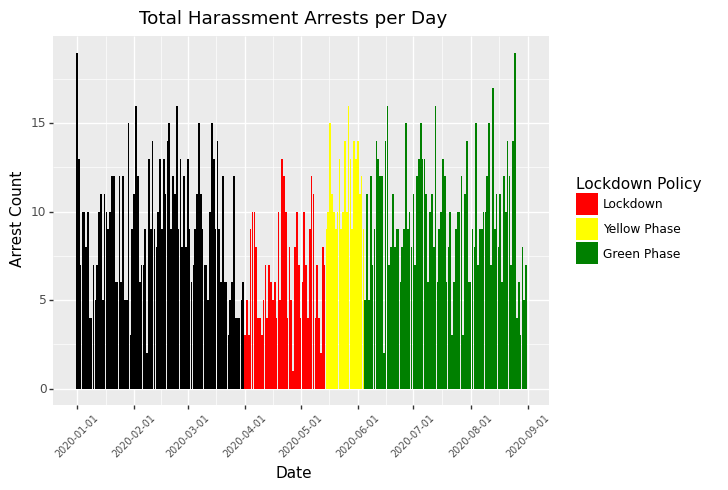

<ggplot: (164331962260)>

In [ ]:
hypo_df = arrests[(arrests['HIERARCHY']==10)]
hypo_df = hypo_df[(hypo_df['Year'] >= 2020)]
hypo_df = hypo_df.groupby(['Year', 'Month', 'Day', 'INCIDENTHIERARCHYDESC']).size()
hypo_df = hypo_df.to_frame(name = 'Arrest Count').reset_index()
hypo_df['Date'] = pd.to_datetime(hypo_df[['Year', 'Month', 'Day']])

conditions4 = [
    (hypo_df['Date'] < '2020-04-01'),
    ((hypo_df['Date'] >= '2020-04-01')&(hypo_df['Date'] < '2020-05-15')),
    ((hypo_df['Date'] >= '2020-05-15')&(hypo_df['Date'] < '2020-06-05')),
    (hypo_df['Date'] >= '2020-06-05')   
]
values4 = ['Pre-Lockdown', 'Lockdown', 'Yellow Phase', 'Green Phase']

hypo_df['Lockdown Policy'] = np.select(conditions4, values4)


ggplot(hypo_df, aes(x='Date', y='Arrest Count', group='Lockdown Policy')) + geom_bar(aes(fill='Lockdown Policy'), stat='identity')\
+labs(title="Total Harassment Arrests per Day")\
+ theme(strip_text = element_text(size=7), axis_text_x=element_text(angle=45, size=7))\
+ scale_fill_manual(breaks=("Pre-lockdown","Lockdown","Yellow Phase","Green Phase"), values = ("green", "red", "black", "yellow"))

As with the assault data, the harassment data is also difficult to interpret, because it is pretty varied from day to day. As with the assault data, this type of data might best be interpreted by looking at specific harassment charges, as was done earlier within this report.

# Public Transit

This part of the notebook will view bike share use follow by bus use. We also tried to explore traffic data as part of our broader mobility research, but this data is too sparse, and so was left out of the analysis for now. 

# Imports

In [ ]:
import pandas as pd
import numpy as np
import datetime
from plotnine import *

# BIKE data

The data we are exploring is spread across many tables, which are all made avialable to the public via the **Western Pennsylvania Regional Data Center**. URL links to each of these data source are provided below.

https://data.wprdc.org/dataset/healthyride-trip-data

*The Western Pennsylvania Regional Data Center is managed by the University of Pittsburgh’s Center for Social and Urban Research. While we do not have particular instances of projects using this data, it is certainly drawn upon by researchers and local governmental, private, and other entities.*

**Healthy Ride trip data:** The data in this table cover a time period from April 2018 to June 2018. Thus, this data table cannot be used by itself in order to changes in ride share participation during the pandemic. If, however, we were able to find data for the time period from April 2020 to June 2020, we might then be able to compare data from these two tables.

**Recommendations:**
    We recommend further analysis on bike share distribution and usage. This could be useful for optimizing performance while pandemic conditions persist.
    
Basic findings:
- Stations that appear to predominantly serve commuters have less demand, while others have seen year-on-year increases. 
- Healthy ride could drill down into their own data and formalize their own definitions for such categories if they do not already do so
- Next areas to explore could include trip duration (also maybe indicative of recreational trips if rising relative to commuting) and connecting FROM-TO stations to see if explicit paths have become noticeably more prevalent during lockdown times (e.g., trip connecting downtown stations may be down due to less commuting, but trips between trail stations or from one neighborhood to another). 

## Cleaning

In [ ]:
bike18_1 = pd.read_csv('healthy-ride-rentals-2018-q1.csv')
bike18_2 = pd.read_csv('healthy-ride-rentals-2018-q2.csv')
bike18_3 = pd.read_csv('healthy-ride-rentals-2018-q3.csv')
bike18_4 = pd.read_csv('healthy-ride-rentals-2018-q4.csv')
bike19_1 = pd.read_csv('healthy-ride-rentals-2019-q1.csv')
bike19_2 = pd.read_csv('healthy-ride-rentals-2019-q2.csv')
bike19_3 = pd.read_csv('healthy-ride-rentals-2019-q3.csv')
bike19_4 = pd.read_csv('healthy-ride-rentals-2019-q4.csv')
bike20_1 = pd.read_csv('healthy-ride-rentals-2020-q1.csv')
bike20_2 = pd.read_csv('healthy-ride-rentals-2020-q2.csv')

C:\Users\danie\anaconda_3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,2,6,8,9) have mixed types.Specify dtype option on import or set low_memory=False.


In [ ]:
bike = pd.concat([bike18_1, bike18_2, bike18_3, bike18_4, bike19_1, bike19_2, bike19_3, bike19_4, bike20_1, bike20_2])

### Create some pandas datetime columns to work better with

In [ ]:
bike['Starttime'] = pd.to_datetime(bike['Starttime'])
bike['Stoptime'] = pd.to_datetime(bike['Stoptime'])
bike['yrmn'] = bike['Stoptime'].dt.to_period('M')
bike['wk'] = bike['Stoptime'].dt.to_period('W-SUN')
bike['day'] = bike['Stoptime'].dt.to_period('D')

bike.head(5)

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,yrmn,wk,day
0,41489490.0,2018-01-01 17:19:00,2018-01-01 17:24:00,70259.0,276.0,1022.0,Liberty Ave & S Millvale Ave (West Penn Hospital),1023.0,Liberty Ave & Baum Blvd,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-01
1,41491355.0,2018-01-02 07:28:00,2018-01-02 10:25:00,70213.0,10575.0,1040.0,O'Hara St and University Place (Soldiers and S...,1037.0,Frew St & Schenley Dr,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-02
2,41491375.0,2018-01-02 07:32:00,2018-01-02 07:59:00,70114.0,1640.0,1049.0,S 12th St & E Carson St,1049.0,S 12th St & E Carson St,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-02
3,41491450.0,2018-01-02 07:45:00,2018-01-02 10:18:00,70252.0,9172.0,1002.0,Third Ave & Wood St,1009.0,12th St & Penn Ave,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-02
4,41492051.0,2018-01-02 09:09:00,2018-01-02 09:10:00,70481.0,61.0,1048.0,S 18th St & Sidney St,1048.0,S 18th St & Sidney St,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-02


In [ ]:
def is_weekend(day):
    if day.dayofweek > 4:
        return 1
    else:
        return 0

In [ ]:
bike['wkend'] = bike['day'].apply(lambda x: is_weekend(x))

In [ ]:
bike = bike[bike['From station id'].notnull()]

In [ ]:
bike.to_csv('healthy_ride_clean.csv',index=False)

In [ ]:
bike.groupby(['From station name', 'yrmn']).agg({'Trip id':'count'}).unstack(1)

Trip id                  \
yrmn                                               2018-01 2018-02 2018-03   
From station name                                                            
00 Bad Fork No BC                                      NaN     NaN     NaN   
00 Extended Repairs                                    NaN     NaN     NaN   
00 Good Bike No BC                                     NaN     NaN     NaN   
10th St & Penn Ave (David L. Lawrence Conventio...    25.0    80.0    94.0   
11th St & Penn Ave                                     NaN     NaN     NaN   
...                                                    ...     ...     ...   
Wood St & Sixth Ave                                    NaN     NaN     NaN   
Zulema St & Coltart Ave                                7.0    13.0     9.0   
nextbike IT - Daniel Desk                              NaN     NaN     NaN   
nextbike IT Daniel Hofmann                             NaN     NaN     NaN   
nextbike IT Daniel Hofmann Exeter                      NaN     NaN     NaN   

                                                                            \
yrmn                                               2018-04 2018-05 2018-06   
From station name                                                            
00 Bad Fork No BC                                      NaN     NaN     NaN   
00 Extended Repairs                                    NaN     NaN     NaN   
00 Good Bike No BC                                     NaN     NaN     NaN   
10th St & Penn Ave (David L. Lawrence Conventio...   229.0   545.0   512.0   
11th St & Penn Ave                                     NaN     NaN     NaN   
...                                                    ...     ...     ...   
Wood St & Sixth Ave                                    NaN     NaN     NaN   
Zulema St & Coltart Ave                               41.0    72.0    72.0   
nextbike IT - Daniel Desk                              NaN     NaN     NaN   
nextbike IT Daniel Hofmann                             NaN     NaN     NaN   
nextbike IT Daniel Hofmann Exeter                      NaN     NaN     NaN   

                                                                            \
yrmn                                               2018-07 2018-08 2018-09   
From station name                                                            
00 Bad Fork No BC                                      NaN     NaN     NaN   
00 Extended Repairs                                    NaN     NaN     NaN   
00 Good Bike No BC                                     NaN     NaN     NaN   
10th St & Penn Ave (David L. Lawrence Conventio...   595.0   473.0   298.0   
11th St & Penn Ave                                     NaN     NaN    50.0   
...                                                    ...     ...     ...   
Wood St & Sixth Ave                                    NaN     NaN     NaN   
Zulema St & Coltart Ave                               92.0    49.0    39.0   
nextbike IT - Daniel Desk                              NaN     NaN     NaN   
nextbike IT Daniel Hofmann                             NaN     NaN     NaN   
nextbike IT Daniel Hofmann Exeter                      NaN     NaN     NaN   

                                                            ...          \
yrmn                                               2018-10  ... 2019-10   
From station name                                           ...           
00 Bad Fork No BC                                      NaN  ...     NaN   
00 Extended Repairs                                    NaN  ...     NaN   
00 Good Bike No BC                                     NaN  ...     NaN   
10th St & Penn Ave (David L. Lawrence Conventio...   203.0  ...   171.0   
11th St & Penn Ave                                    58.0  ...   156.0   
...                                                    ...  ...     ...   
Wood St & Sixth Ave                                    2.0  ...   128.0   
Zulema St & Coltart Av

### After exploring the merged sets, it was clear some station names aren't useful for the analysis (e.g., missing, transit...)

In [ ]:
drop_list = ['00 Bad Fork No BC',
'00 Extended Repairs',
'00 Good Bike No BC',
'Missing',
'Missing New',
'nextbike IT - Daniel Desk',
'nextbike IT Daniel Hofmann',
'nextbike IT Daniel Hofmann Exeter',
'Rebuilds',
"Sara's Car",
'Transit',
'Trike',
'Justin Testing Station']

bike = bike[~bike['From station name'].isin(drop_list)]

# Save cleaned data for easier return
bike.to_csv('healthy_ride_clean.csv',index=False)

## Clean data read

In [ ]:
bike = pd.read_csv('healthy_ride_clean.csv')

In [ ]:
def is_weekend(day):
    if day.dayofweek > 4:
        return 1
    else:
        return 0

### Implement time transformations and adding columns for easier analysis

In [ ]:
bike['Starttime'] = pd.to_datetime(bike['Starttime'])
bike['Stoptime'] = pd.to_datetime(bike['Stoptime'])
bike['yrmn'] = bike['Stoptime'].dt.to_period('M')
bike['wk'] = bike['Stoptime'].dt.to_period('W-SUN')
bike['day'] = bike['Stoptime'].dt.to_period('D')
bike['wkend'] = bike['day'].apply(lambda x: is_weekend(x))
bike['wkend_cat']= bike['wkend'].apply(lambda x: 'weekend' if x == 1 else 'weekday')
bike['wkend_cat']=bike['wkend_cat'].astype('category')

In [ ]:
bike

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,yrmn,wk,day,wkend,wkend_cat
0,41489490.0,2018-01-01 17:19:00,2018-01-01 17:24:00,70259.0,276.0,1022.0,Liberty Ave & S Millvale Ave (West Penn Hospital),1023.0,Liberty Ave & Baum Blvd,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-01,0,weekday
1,41491355.0,2018-01-02 07:28:00,2018-01-02 10:25:00,70213.0,10575.0,1040.0,O'Hara St and University Place (Soldiers and S...,1037.0,Frew St & Schenley Dr,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-02,0,weekday
2,41491375.0,2018-01-02 07:32:00,2018-01-02 07:59:00,70114.0,1640.0,1049.0,S 12th St & E Carson St,1049.0,S 12th St & E Carson St,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-02,0,weekday
3,41491450.0,2018-01-02 07:45:00,2018-01-02 10:18:00,70252.0,9172.0,1002.0,Third Ave & Wood St,1009.0,12th St & Penn Ave,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-02,0,weekday
4,41492051.0,2018-01-02 09:09:00,2018-01-02 09:10:00,70481.0,61.0,1048.0,S 18th St & Sidney St,1048.0,S 18th St & Sidney St,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-02,0,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210241,94983907.0,2020-05-08 13:37:00,2020-05-08 14:04:00,70112.0,1625.0,1033.0,Ivy St & Walnut St,1045.0,S 27th St & Sidney St. (Southside Works),Customer,2020-05,2020-05-04/2020-05-10,2020-05-08,0,weekday
210242,94985868.0,2020-05-08 14:03:00,2020-05-08 14:14:00,70030.0,695.0,1056.0,Wood St & Sixth Ave,1015.0,Federal St & E North Ave,Subscriber,2020-05,2020-05-04/2020-05-10,2020-05-08,0,weekday
210243,94987200.0,2020-05-08 14:21:00,2020-05-08 14:38:00,70450.0,983.0,1094.0,O'Hara St & Desoto St,1029.0,Alder St & S Highland Ave,Subscriber,2020-05,2020-05-04/2020-05-10,2020-05-08,0,weekday
210244,94992675.0,2020-05-08 16:19:00,2020-05-08 16:28:00,70318.0,571.0,1020.0,42nd & Penn Ave.,1059.0,Burns White Center at 3 Crossings,Subscriber,2020-05,2020-05-04/2020-05-10,2020-05-08,0,weekday


# **Hypothesis 1**: Bike share use is up

## First check is to see if trip counts across all stations are up for each month period

<AxesSubplot:xlabel='yrmn'>

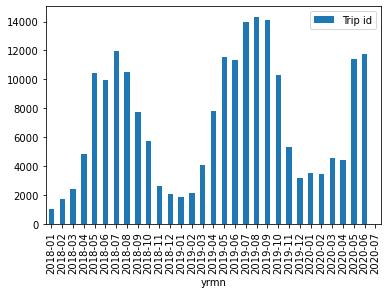

In [ ]:
bike.groupby('yrmn').agg({'Trip id':'count'}).plot.bar()

## Bike ridership is about the same trend overall outside of being down in March and April 2020, which were peak COVID scare months. 
### This means the first hypothesis has failed. 
### Overall rides is not the only interesting bit, however. I've run a check at station-level and here is one that increased quite steeply y/y in May

<AxesSubplot:xlabel='None,yrmn'>

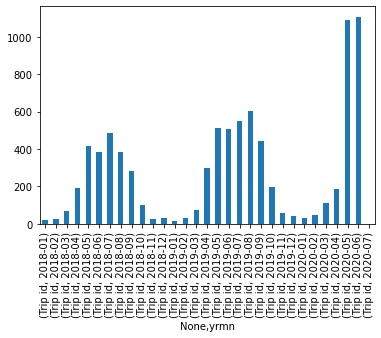

In [ ]:
bike.groupby(['From station id', 'yrmn']).agg({'Trip id':'count'}).unstack(1).loc[1012.0].plot.bar()

## Get details by station. 
### We can identify heavily used routes and their location from names

In [ ]:
bike.groupby(['From station id', 'From station name']).size().sort_values(ascending=False)[:30]

From station id  From station name                                       
1000.0           Liberty Ave & Stanwix St                                    9830
1012.0           North Shore Trail & Fort Duquesne Bridge                    8330
1001.0           Forbes Ave & Market Square                                  7971
1045.0           S 27th St & Sidney St. (Southside Works)                    7739
1013.0           Isabella St & Federal St (PNC Park)                         6689
1017.0           21st St & Penn Ave                                          5835
1010.0           10th St & Penn Ave (David L. Lawrence Convention Center)    5683
1048.0           S 18th St & Sidney St                                       4910
1049.0           S 12th St & E Carson St                                     4320
1015.0           Federal St & E North Ave                                    4213
1016.0           17th St & Penn Ave                                          4132
1047.0           S 22nd 

## Zoom in on a commuter route bike station 

### Third Avenue and Wood street is downtown and abuts 2 parking lots (i.e., major commuting thoroughfare)

<AxesSubplot:xlabel='None,yrmn'>

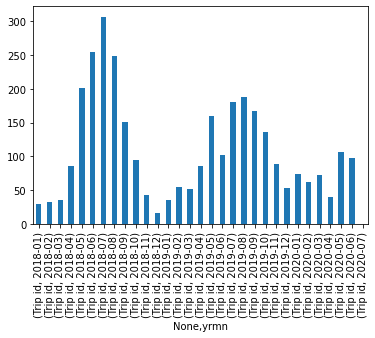

In [ ]:
bike.groupby(['From station id', 'yrmn']).agg({'Trip id':'count'}).unstack(1).loc[1002.0].plot.bar()

## This seems to confirm **Hypothesis 2** - that we might see some changes between commuter/recreational paths.

### Now check a recreational route, like a River trail bike station

<AxesSubplot:xlabel='None,yrmn'>

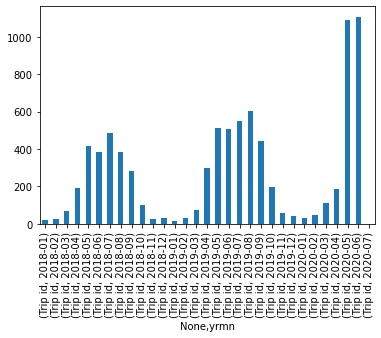

In [ ]:
bike.groupby(['From station id', 'yrmn']).agg({'Trip id':'count'}).unstack(1).loc[1012.0].plot.bar()

In [ ]:
rt_compare = bike[bike['From station id'].isin(['1002','1012'])]

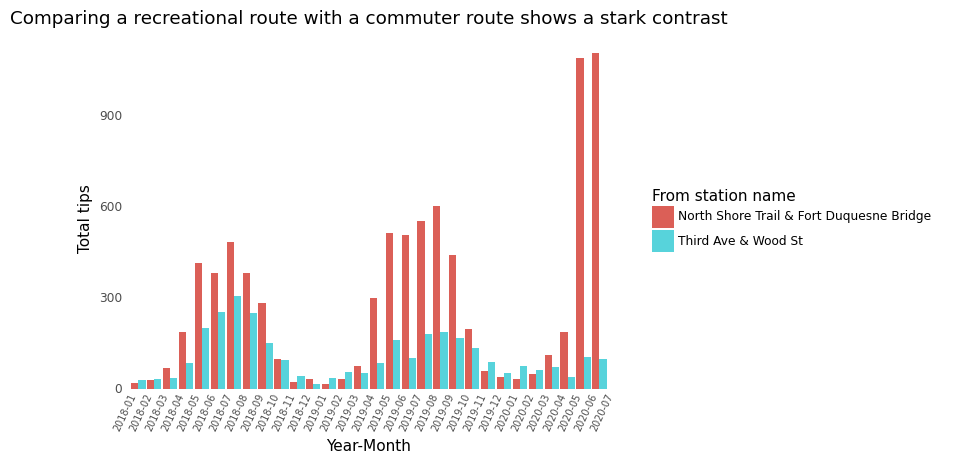

<ggplot: (150540038063)>

In [ ]:
(
ggplot(rt_compare, aes(x='yrmn', fill='From station name'))
    + geom_bar(position='dodge')
    + theme(axis_text_x = element_text(angle = 65, vjust = 0.5, hjust=1, size=7), axis_ticks = element_blank(),panel_background=element_blank())
    + labs(x = "Year-Month", y = "Total tips", title ="Comparing a recreational route with a commuter route shows a stark contrast")
)

The chart above suggests this is worth look across stations for. 

## Another useful view to drill down to commuter/recreational use is to view by user type

We assume subscribed users are much more likely to be commuters. Customers, conversely, are more often people interested in using the bikes when it is nice out and as an outdoor activity. 

In [ ]:
cust_tot = bike[bike['Usertype']=='Customer'].groupby('yrmn').size()
sub_tot = bike[bike['Usertype']=='Subscriber'].groupby('yrmn').size()
user = pd.concat([cust_tot,sub_tot], axis=1)
user = user.reset_index()
user.columns = ['yrmn','cus','sub']

In [ ]:
# Check change in the months we have in 2020 (so, through 2nd quarter)
user[user['yrmn'].dt.month.isin([1,2,3,4, 5,6])]

,yrmn,cus,sub
0,2018-01,250,782
1,2018-02,648,1094
2,2018-03,1030,1374
3,2018-04,2705,2150
4,2018-05,6177,4234
5,2018-06,5943,4037
12,2019-01,438,1437
13,2019-02,661,1460
14,2019-03,1892,2192
15,2019-04,4305,3524


## We see that subscriber rates fell off a cliff this year after March. 
### Perhaps no one renewed, and instead chose on-off pay as you go trips. Healthy ride subscriptions are monthly, so many folks likely let their subscription lapse in April as this is precisely when Gov. Wolf mandated stay at home orders.  

<AxesSubplot:>

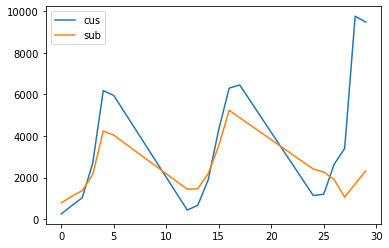

In [ ]:
user[user['yrmn'].dt.month.isin([1,2,3,4, 5,6])].plot()

<AxesSubplot:>

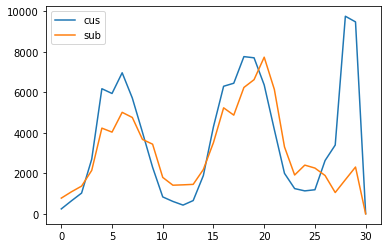

In [ ]:
# Full timeline just to see all of the trend
user.plot()

In [ ]:
df = user[user['yrmn'].dt.month.isin([5,6])]
df['yr']=df['yrmn'].dt.year

<ipython-input-20-6206c9e24e96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:xlabel='yr'>

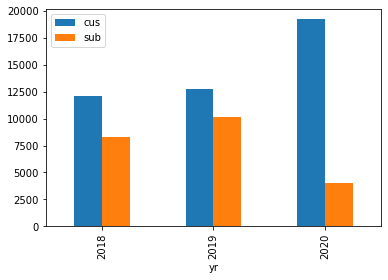

In [ ]:
# Similar data as before, but show in a bar chart
df.groupby('yr').agg({'cus':'sum',
                     'sub':'sum'}).plot.bar()

## Try for a better split into commuter versus recreational routes

I want to use the subscriber/customer information and weekend to weekday usage information to get some insight into this commuter/recreational view. This is an assumption for the work and, as noted, may be formalized or better known by those within the organization. But it is a reasonable first pass, I believe. 

In [ ]:
tot = bike.groupby(['From station name', 'yrmn','wk','day']).agg({'Trip id':'count', 'wkend':'sum'})
cust = bike[bike['Usertype']=='Customer'].groupby(['From station name', 'yrmn','wk','day']).agg({'Trip id':'count', 'wkend':'sum'})
sub = bike[bike['Usertype']=='Subscriber'].groupby(['From station name', 'yrmn','wk','day']).agg({'Trip id':'count', 'wkend':'sum'})

In [ ]:
bike_comm = pd.concat([tot, sub, cust], axis=1)
bike_comm.columns = ['n_all','n_wkend','n_sub','n_sub_wkend','n_cus', 'n_cus_wkend']
bike_comm.head(10)

n_all  \
From station name                                  yrmn    wk                    day                 
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01 2018-01-01/2018-01-07 2018-01-03      1   
                                                           2018-01-08/2018-01-14 2018-01-09      1   
                                                                                 2018-01-10      3   
                                                                                 2018-01-11      3   
                                                                                 2018-01-12      2   
                                                           2018-01-15/2018-01-21 2018-01-18      1   
                                                           2018-01-22/2018-01-28 2018-01-22      2   
                                                                                 2018-01-23      2   
                                                                                 2018-01-24      1   
                                                                                 2018-01-25      1   

                                                                                             n_wkend  \
From station name                                  yrmn    wk                    day                   
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01 2018-01-01/2018-01-07 2018-01-03        0   
                                                           2018-01-08/2018-01-14 2018-01-09        0   
                                                                                 2018-01-10        0   
                                                                                 2018-01-11        0   
                                                                                 2018-01-12        0   
                                                           2018-01-15/2018-01-21 2018-01-18        0   
                                                           2018-01-22/2018-01-28 2018-01-22        0   
                                                                                 2018-01-23        0   
                                                                                 2018-01-24        0   
                                                                                 2018-01-25        0   

                                                                                             n_sub  \
From station name                                  yrmn    wk                    day                 
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01 2018-01-01/2018-01-07 2018-01-03    1.0   
                                                           2018-01-08/2018-01-14 2018-01-09    1.0   
                                                                                 2018-01-10    3.0   
                                                                                 2018-01-11    3.0   
                                                                                 2018-01-12    2.0   
                                                           2018-01-15/2018-01-21 2018-01-18    1.0   
                                                           2018-01-22/2018-01-28 2018-01-22    2.0   
                                                                                 2018-01-23    2.0   
                                                                                 2018-01-24    NaN   
                                                                                 2018-01-25    1.0   

                                                                                             n_sub_wkend  \
From station name                                  yrmn    wk                    day                       
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01 2018-01-01/2018-01-07 2018-01-03          0.0   
                                                           2018-01-08/

### Get some ratios for our data

In [ ]:
bike_comm['sub_ratio'] = bike_comm['n_sub']/bike_comm['n_all']
bike_comm['cus_ratio'] = 1-bike_comm['sub_ratio']
bike_comm['wkend_ratio'] = bike_comm['n_wkend']/bike_comm['n_all']
bike_comm['wk_ratio'] = 1-bike_comm['wkend_ratio']
bike_comm['sub_wkend_ratio'] = bike_comm['n_sub_wkend']/bike_comm['n_sub']
bike_comm['cus_wkend_ratio'] = bike_comm['n_cus_wkend']/bike_comm['n_cus']

In [ ]:
cols = ['From_station','YrMn','Wk','Day','Total','Tot_Wkend','Total_sub',
        'Total_sub_wkend','Total_cust','Total_cust_wkend','Sub_ratio','Cust_ratio',
       'Wkend_ratio','Wk_ratio','Sub_wkend_ratio','Cust_wkend_ratio']

bike_comm = bike_comm.reset_index()
bike_comm.columns = cols
bike_comm.head()

,From_station,YrMn,Wk,Day,Total,Tot_Wkend,Total_sub,Total_sub_wkend,Total_cust,Total_cust_wkend,Sub_ratio,Cust_ratio,Wkend_ratio,Wk_ratio,Sub_wkend_ratio,Cust_wkend_ratio
0,10th St & Penn Ave (David L. Lawrence Conventi...,2018-01,2018-01-01/2018-01-07,2018-01-03,1,0,1.0,0.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,NaN
1,10th St & Penn Ave (David L. Lawrence Conventi...,2018-01,2018-01-08/2018-01-14,2018-01-09,1,0,1.0,0.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,NaN
2,10th St & Penn Ave (David L. Lawrence Conventi...,2018-01,2018-01-08/2018-01-14,2018-01-10,3,0,3.0,0.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,NaN
3,10th St & Penn Ave (David L. Lawrence Conventi...,2018-01,2018-01-08/2018-01-14,2018-01-11,3,0,3.0,0.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,NaN
4,10th St & Penn Ave (David L. Lawrence Conventi...,2018-01,2018-01-08/2018-01-14,2018-01-12,2,0,2.0,0.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,NaN


In [ ]:
# This is a dictionary of col transformations for GROUPBYs
agg_dict = {'Total':'sum','Tot_Wkend':'sum','Total_sub':'sum',
        'Total_sub_wkend':'sum','Total_cust':'sum','Total_cust_wkend':'sum','Sub_ratio':'mean','Cust_ratio':'mean',
       'Wkend_ratio':'mean','Wk_ratio':'mean','Sub_wkend_ratio':'mean','Cust_wkend_ratio':'mean'}

## Check subscriber ratio changes and weekday ratio change

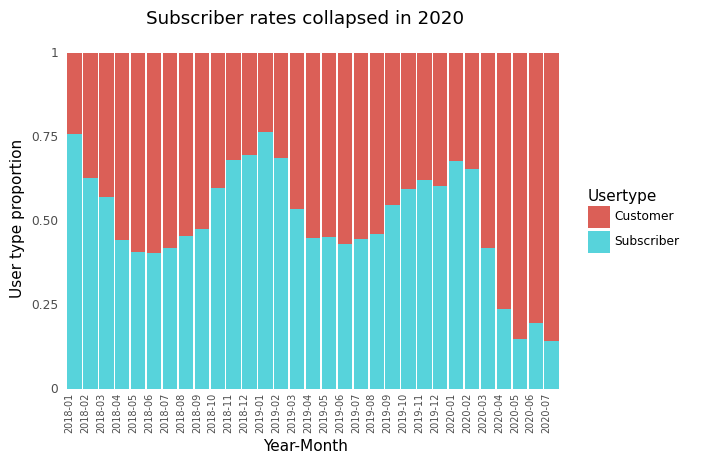

<ggplot: (150539315505)>

In [ ]:

(
ggplot(bike[bike['Usertype'].notnull()], aes('yrmn', fill='Usertype'))
    + geom_bar(position='fill')
    + theme(axis_text_x = element_text(angle = 90, vjust = 0.5, hjust=1, size=7), axis_ticks = element_blank(), 
            panel_background=element_blank(), panel_border=element_blank(), plot_background=element_blank())
    + labs( x = "Year-Month", y = "User type proportion", title ="Subscriber rates collapsed in 2020", caption = "Proportion of trips taken by subscribers versus customers")
)

## Check weekday ratio changes and weekday ratio change

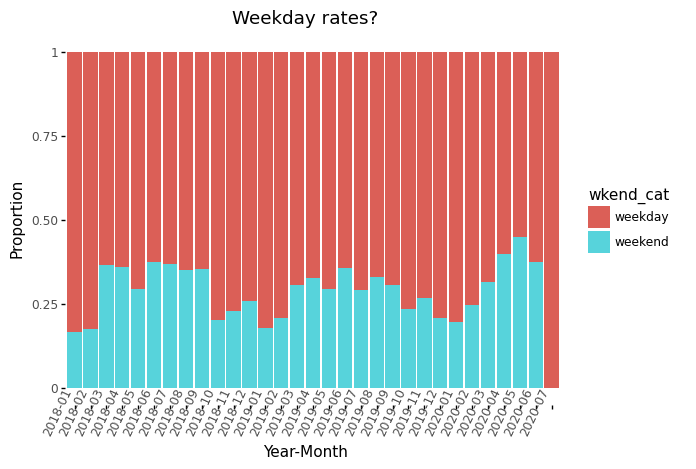

<ggplot: (150539112635)>

In [ ]:

(
ggplot(bike, aes('yrmn', fill='wkend_cat'))
    + geom_bar(position='fill')
    + theme(axis_text_x = element_text(angle = 65, vjust = 0.5, hjust=1), panel_background=element_blank(), panel_border=element_blank(), plot_background=element_blank())
    + labs( x = "Year-Month", y = "Proportion", title ="Weekday rates?", caption = "Proportion of trips taken on weekends versus weekdays")
)

It looks like the subscriber/customer ratios are insightful, but less so for weekend/weekday. If many people were off work in this time anyway, it may be that the typical weekend/weekday usage broke down.

## Identify commuter versus recreation routes
### This assumes commuting routes will have greater than average weekly users than non-commuter routes. Also, a majority of the trips will be by subscribers. I use 2018 and 2019 data to build these splits.

In [ ]:
s_wk_ratio = bike_comm[bike_comm['YrMn']<pd.Period('2020-01', freq='M')].groupby('From_station').agg(agg_dict)[['Wk_ratio', 'Sub_ratio']].sort_values(by='Wk_ratio',ascending=False)
s_wk_ratio.describe()

,Wk_ratio,Sub_ratio
count,122.000000,121.000000
mean,0.728832,0.743664
std,0.110073,0.126729
min,0.000000,0.285714
25%,0.717714,0.678355
50%,0.737930,0.770261
75%,0.763638,0.829227
max,0.888000,1.000000


In [ ]:
# The mask checks for > average weekday usage and majority subscriber trips
comm_mask = (s_wk_ratio['Wk_ratio']>0.738) & (s_wk_ratio['Sub_ratio']>0.50)
comm_stations = s_wk_ratio[comm_mask].index

In [ ]:
# All stations not classified as commuter called recreational. 
rec_stations = set(s_wk_ratio.index) - set(comm_stations)

In [ ]:
mn = bike_comm.groupby(['From_station','YrMn']).agg(agg_dict)
mn.head()

Total  Tot_Wkend  \
From_station                                       YrMn                        
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01     25          0   
                                                   2018-02     80          9   
                                                   2018-03     94         18   
                                                   2018-04    229         49   
                                                   2018-05    545        163   

                                                            Total_sub  \
From_station                                       YrMn                 
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01       24.0   
                                                   2018-02       54.0   
                                                   2018-03       71.0   
                                                   2018-04      130.0   
                                                   2018-05      240.0   

                                                            Total_sub_wkend  \
From_station                                       YrMn                       
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01              0.0   
                                                   2018-02              2.0   
                                                   2018-03              9.0   
                                                   2018-04             11.0   
                                                   2018-05             19.0   

                                                            Total_cust  \
From_station                                       YrMn                  
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01         1.0   
                                                   2018-02        26.0   
                                                   2018-03        23.0   
                                                   2018-04        99.0   
                                                   2018-05       305.0   

                                                            Total_cust_wkend  \
From_station                                       YrMn                        
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01               0.0   
                                                   2018-02               7.0   
                                                   2018-03               9.0   
                                                   2018-04              38.0   
                                                   2018-05             144.0   

                                                            Sub_ratio  \
From_station                                       YrMn                 
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01   1.000000   
                                                   2018-02   0.821526   
                                                   2018-03   0.846000   
                                                   2018-04   0.631390   
                                                   2018-05   0.493272   

                                                            Cust_ratio  \
From_station                                       YrMn                  
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01    0.000000   
                                                   2018-02    0.178474   
                                                   2018-03    0.154000   
                                                   2018-04    0.368610   
                                                   2018-05    0.506728   

                                                            Wkend_ratio  \
From_station                                       YrMn                   
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01     0.000000   
                                                   2018-02     0.173913   
                      

In [ ]:
## The plots below split the trips by routes with > 50% subscriber use to see how they fall out

In [ ]:
mn.loc[comm_stations]

Total  Tot_Wkend  Total_sub  \
From_station                         YrMn                                   
Forbes Ave & Jumonville St           2019-01     22          1       18.0   
                                     2019-02     19          2       13.0   
                                     2019-03     18          0       15.0   
                                     2019-04     36          5       29.0   
                                     2019-05     23          1       21.0   
...                                             ...        ...        ...   
Penn Ave & Putnam St (Bakery Square) 2020-02     32          3       27.0   
                                     2020-03     43         11       25.0   
                                     2020-04     52         10       27.0   
                                     2020-05     88         31       40.0   
                                     2020-06    131         40       73.0   

                                              Total_sub_wkend  Total_cust  \
From_station                         YrMn                                   
Forbes Ave & Jumonville St           2019-01              0.0         4.0   
                                     2019-02              1.0         6.0   
                                     2019-03              0.0         3.0   
                                     2019-04              3.0         7.0   
                                     2019-05              1.0         2.0   
...                                                       ...         ...   
Penn Ave & Putnam St (Bakery Square) 2020-02              2.0         5.0   
                                     2020-03              3.0        18.0   
                                     2020-04              5.0        25.0   
                                     2020-05              8.0        48.0   
                                     2020-06             19.0        58.0   

                                              Total_cust_wkend  Sub_ratio  \
From_station                         YrMn                                   
Forbes Ave & Jumonville St           2019-01               1.0   0.911765   
                                     2019-02               1.0   0.902778   
                                     2019-03               0.0   0.961538   
                                     2019-04               2.0   0.877193   
                                     2019-05               0.0   0.950000   
...                                                        ...        ...   
Penn Ave & Putnam St (Bakery Square) 2020-02               1.0   0.895833   
                                     2020-03               8.0   0.868333   
                                     2020-04               5.0   0.702899   
                                     2020-05              23.0   0.632479   
                                     2020-06              21.0   0.627659   

                                              Cust_ratio  Wkend_ratio  \
From_station                         YrMn                               
Forbes Ave & Jumonville St           2019-01    0.088235     0.055556   
                                     2019-02    0.097222     0.142857   
                                     2019-03    0.038462     0.000000   
                                     2019-04    0.122807     0.105263   
                                     2019-05    0.050000     0.071429   
...                                                  ...          ...   
Penn Ave & Putnam St (Bakery Square) 2020-02    0.104167     0.058824   
                                     2020-03    0.131667     0.217391   
                                     2020-04    0.297101     0.153846   
                                     2020-05    0.367521     0.300000   
                                     2020-06    0.372341     0.266667   

                                              Wk_ratio  Sub_wkend_ratio  \
From_station   

In [ ]:
mn.loc[rec_stations]

Total  Tot_Wkend  Total_sub  \
From_station                    YrMn                                   
Frankstown Ave & E Liberty Blvd 2018-07     35         35        8.0   
                                2018-12      3          0        2.0   
                                2019-01      1          0        1.0   
                                2019-03      4          1        3.0   
                                2019-04      7          3        4.0   
...                                        ...        ...        ...   
Centre Ave & N Craig St         2020-02     49         17       39.0   
                                2020-03     41          8       27.0   
                                2020-04     52         22       33.0   
                                2020-05     51         22       24.0   
                                2020-06     79         27       33.0   

                                         Total_sub_wkend  Total_cust  \
From_station                    YrMn                                   
Frankstown Ave & E Liberty Blvd 2018-07              8.0        27.0   
                                2018-12              0.0         1.0   
                                2019-01              0.0         0.0   
                                2019-03              1.0         1.0   
                                2019-04              1.0         3.0   
...                                                  ...         ...   
Centre Ave & N Craig St         2020-02             10.0        10.0   
                                2020-03              5.0        14.0   
                                2020-04             12.0        19.0   
                                2020-05              4.0        27.0   
                                2020-06             14.0        46.0   

                                         Total_cust_wkend  Sub_ratio  \
From_station                    YrMn                                   
Frankstown Ave & E Liberty Blvd 2018-07              27.0   0.228571   
                                2018-12               0.0   1.000000   
                                2019-01               0.0   1.000000   
                                2019-03               0.0   1.000000   
                                2019-04               2.0   1.000000   
...                                                   ...        ...   
Centre Ave & N Craig St         2020-02               7.0   0.866667   
                                2020-03               3.0   0.828704   
                                2020-04              10.0   0.807143   
                                2020-05              18.0   0.763542   
                                2020-06              13.0   0.592105   

                                         Cust_ratio  Wkend_ratio  Wk_ratio  \
From_station                    YrMn                                         
Frankstown Ave & E Liberty Blvd 2018-07    0.771429     1.000000  0.000000   
                                2018-12    0.000000     0.000000  1.000000   
                                2019-01    0.000000     0.000000  1.000000   
                                2019-03    0.000000     0.333333  0.666667   
                                2019-04    0.000000     0.333333  0.666667   
...                                             ...          ...       ...   
Centre Ave & N Craig St         2020-02    0.133333     0.360000  0.640000   
                                2020-03    0.171296     0.190476  0.809524   
                                2020-04    0.192857     0.291667  0.708333   
                                2020-05    0.236458     0.320000  0.680000   
                                2020-06    0.407895     0.285714  0.714286   

                                         Sub_wkend_ratio  Cust_wkend_ratio  
From_station                    YrMn                                        
Frankstown Ave & E Liberty Blvd 2018-07         1.000000     

### Check overall monthly trips across stations identified as commuter stations

<AxesSubplot:xlabel='YrMn'>

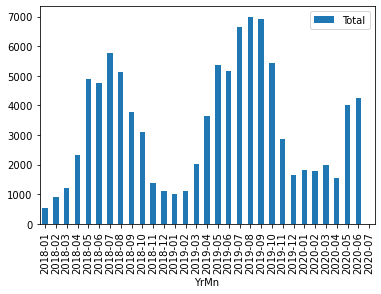

In [ ]:
mn.loc[comm_stations].groupby('YrMn').agg({'Total':'sum'}).plot.bar()

## Compare this to those considered recreational in our split

<AxesSubplot:xlabel='YrMn'>

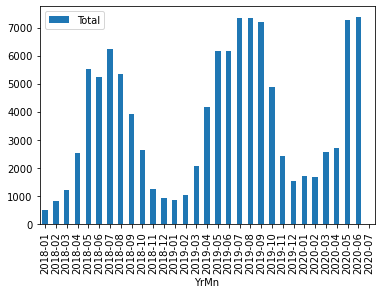

In [ ]:
mn.loc[rec_stations].groupby('YrMn').agg({'Total':'sum'}).plot.bar()

Clearly, commuter stations are down. We see quite a spike in May and June 2020 in recreational stations, as well. 

This is worth making into a good visualization - the code below does so.

In [ ]:
bike_comm['Yr']=bike_comm['YrMn'].dt.year
bike_comm['Mn']=bike_comm['YrMn'].dt.month

In [ ]:
bike_comm['Route type']=bike_comm['From_station'].apply(lambda x: 'Commuter' if x in comm_stations else "Recreation")

In [ ]:
bike_comm['Route type'] = bike_comm['Route type'].astype('category')

In [ ]:
facet_data = bike_comm.groupby(['Yr','Mn','Route type']).agg(agg_dict).reset_index()
facet_data.head()

,Yr,Mn,Route type,Total,Tot_Wkend,Total_sub,Total_sub_wkend,Total_cust,Total_cust_wkend,Sub_ratio,Cust_ratio,Wkend_ratio,Wk_ratio,Sub_wkend_ratio,Cust_wkend_ratio
0,2018,1,Commuter,547.0,59.0,449.0,39.0,98.0,20.0,0.927556,0.072444,0.124183,0.875817,0.110294,0.187500
1,2018,1,Recreation,485.0,113.0,333.0,53.0,152.0,60.0,0.904752,0.095248,0.224199,0.775801,0.179487,0.361702
2,2018,2,Commuter,915.0,116.0,654.0,58.0,261.0,58.0,0.872573,0.127427,0.174479,0.825521,0.136364,0.214286
3,2018,2,Recreation,827.0,190.0,440.0,78.0,387.0,112.0,0.816655,0.183345,0.265363,0.734637,0.229927,0.289617
4,2018,3,Commuter,1206.0,322.0,758.0,100.0,448.0,222.0,0.851325,0.148675,0.245059,0.754941,0.161692,0.393162


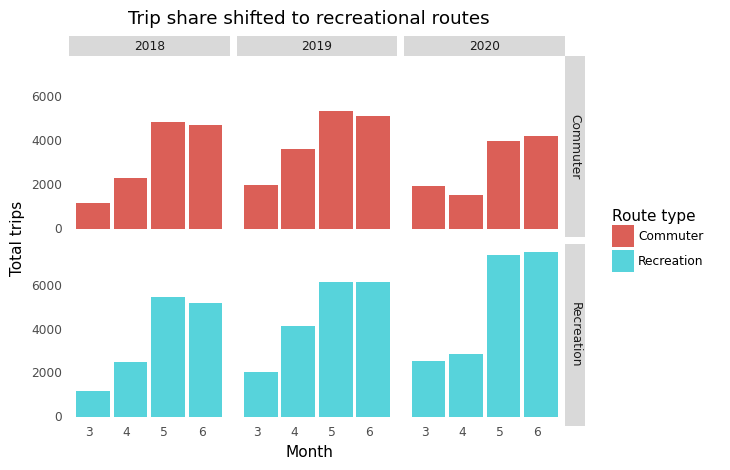

<ggplot: (150545548219)>

In [ ]:
(
ggplot(facet_data[facet_data['Mn'].isin([3,4,5,6])], aes(x='Mn',y = 'Total', fill='Route type'))
       + geom_bar(stat="identity")
       + facet_grid('Route type ~  Yr')
       + theme(axis_text_x = element_text(angle = 0, vjust = 0.5, hjust=1), axis_ticks = element_blank(),panel_background=element_blank(), panel_border=element_blank(), plot_background=element_blank())
       + labs( x = "Month", y = "Total trips", title ="Trip share shifted to recreational routes")
)

In [ ]:
ratio_data = bike_comm[bike_comm['Day']>=pd.Period('2020-03-01', freq='D')]

In [ ]:
ratio_data.groupby('Day').agg(agg_dict)

,Total,Tot_Wkend,Total_sub,Total_sub_wkend,Total_cust,Total_cust_wkend,Sub_ratio,Cust_ratio,Wkend_ratio,Wk_ratio,Sub_wkend_ratio,Cust_wkend_ratio
Day,,,,,,,,,,,,
2020-03-01,149,149,51.0,51.0,98.0,98.0,0.706061,0.293939,1.0,0.0,1.0,1.0
2020-03-02,114,0,74.0,0.0,40.0,0.0,0.867000,0.133000,0.0,1.0,0.0,0.0
2020-03-03,145,0,100.0,0.0,45.0,0.0,0.878122,0.121878,0.0,1.0,0.0,0.0
2020-03-04,175,0,133.0,0.0,42.0,0.0,0.851667,0.148333,0.0,1.0,0.0,0.0
2020-03-05,243,0,141.0,0.0,102.0,0.0,0.765272,0.234728,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-28,550,550,68.0,68.0,482.0,482.0,0.397276,0.602724,1.0,0.0,1.0,1.0
2020-06-29,405,0,114.0,0.0,291.0,0.0,0.527371,0.472629,0.0,1.0,0.0,0.0
2020-06-30,395,0,103.0,0.0,292.0,0.0,0.505304,0.494696,0.0,1.0,0.0,0.0


## A final useful chart will zoom in on the actual days we know the government enacted stages of lockdown and reopening. 

**Below are the dates for Allegheny county**

- Mandated lockdown: 2020-03-01
- Yellow phase (reopening): 2020-05-15
- Green phase: 2020-06-05

In [ ]:
bike2 = bike[bike['day']>=pd.Period('2020-03-01', freq='D')]
green1 = (bike['day'] >= pd.Period('2020-03-01', freq='D')) & (bike['day'] < pd.Period('2020-04-01', freq='D'))
red = (bike['day'] >= pd.Period('2020-04-01', freq='D')) & (bike['day'] < pd.Period('2020-05-15', freq='D'))
yellow = (bike['day'] >= pd.Period('2020-05-15', freq='D')) & (bike['day'] < pd.Period('2020-06-05', freq='D'))
green2 = (bike['day'] >= pd.Period('2020-06-05', freq='D'))
g1 = bike.loc[green1]
r = bike.loc[red]
y = bike.loc[yellow]
g2 = bike.loc[green2]

In [ ]:
bike2 = bike_comm[bike_comm['Day']>pd.Period('2020-03-01', freq='D')]
green1 = (bike_comm['Day'] >= pd.Period('2020-03-01', freq='D')) & (bike_comm['Day'] < pd.Period('2020-04-01', freq='D'))
red = (bike_comm['Day'] >= pd.Period('2020-04-01', freq='D')) & (bike_comm['Day'] < pd.Period('2020-05-15', freq='D'))
yellow = (bike_comm['Day'] >= pd.Period('2020-05-15', freq='D')) & (bike_comm['Day'] < pd.Period('2020-06-05', freq='D'))
green2 = (bike_comm['Day'] >= pd.Period('2020-06-05', freq='D'))
g1 = bike_comm.loc[green1]
r = bike_comm.loc[red]
y = bike_comm.loc[yellow]
g2 = bike_comm.loc[green2]

<AxesSubplot:xlabel='Day'>

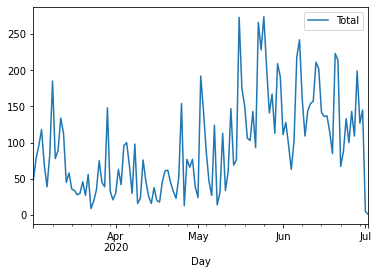

In [ ]:
bike2[bike2['From_station'].isin(comm_stations)].groupby('Day').agg({'Total':'sum'}).plot()

<AxesSubplot:xlabel='Day'>

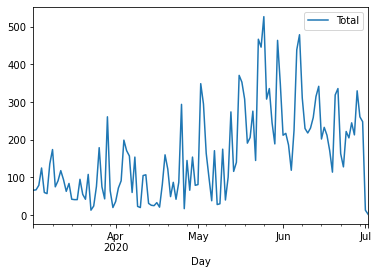

In [ ]:
bike2[bike2['From_station'].isin(rec_stations)].groupby('Day').agg({'Total':'sum'}).plot()

We see a difference in these, so the below code will make these charts share the same Y scale and break the lines apart into their phases of lockdown.

In [ ]:
comm_pandemic = bike2[bike2['From_station'].isin(comm_stations)].groupby('Day').agg({'Total':'sum'})
comm_pandemic = comm_pandemic.reset_index()
comm_pandemic.columns = ['Day','Trips']

In [ ]:
rec_pandemic = bike2[bike2['From_station'].isin(rec_stations)].groupby('Day').agg({'Total':'sum'})
rec_pandemic = rec_pandemic.reset_index()
rec_pandemic.columns = ['Day','Trips']

In [ ]:
green1 = (comm_pandemic['Day'] >= pd.Period('2020-03-01', freq='D')) & (comm_pandemic['Day'] <= pd.Period('2020-04-01', freq='D'))
red = (comm_pandemic['Day'] >= pd.Period('2020-04-01', freq='D')) & (comm_pandemic['Day'] <= pd.Period('2020-05-15', freq='D'))
yellow = (comm_pandemic['Day'] >= pd.Period('2020-05-15', freq='D')) & (comm_pandemic['Day'] <= pd.Period('2020-06-05', freq='D'))
green2 = (comm_pandemic['Day'] >= pd.Period('2020-06-05', freq='D'))
g1 = comm_pandemic.loc[green1]
r = comm_pandemic.loc[red]
y = comm_pandemic.loc[yellow]
g2 = comm_pandemic.loc[green2]

In [ ]:
g1['Period'] = 'Pre-lockdown'
r['Period'] = 'Lockdown'
y['Period'] = 'Yellow Phase'
g2['Period'] = 'Green Phase'

<ipython-input-62-f9f68325e5bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-62-f9f68325e5bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-62-f9f68325e5bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-62-f9f68325e5bd>

In [ ]:
comm_period = pd.concat([g1,r,y,g2])
comm_period['Period'] = comm_period['Period'].astype('category')
comm_period

,Day,Trips,Period
0,2020-03-02,48,Pre-lockdown
1,2020-03-03,78,Pre-lockdown
2,2020-03-04,96,Pre-lockdown
3,2020-03-05,118,Pre-lockdown
4,2020-03-06,69,Pre-lockdown
...,...,...,...
118,2020-06-28,199,Green Phase
119,2020-06-29,127,Green Phase
120,2020-06-30,145,Green Phase
121,2020-07-01,5,Green Phase


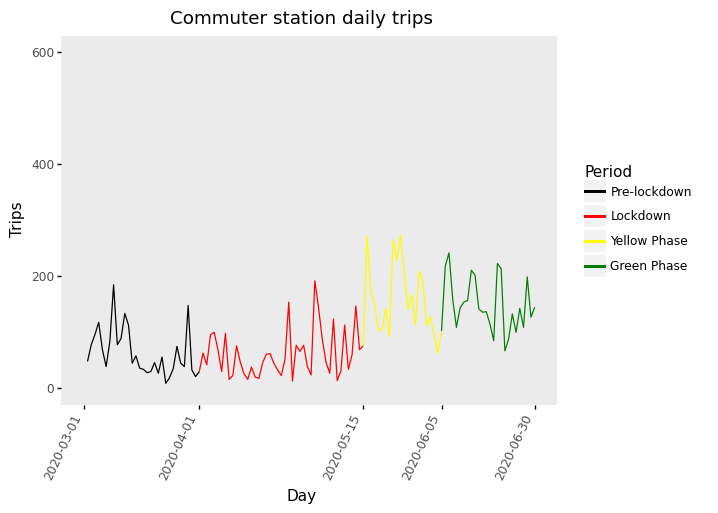

<ggplot: (150545626805)>

In [ ]:
(
ggplot(comm_period) +
    aes(x='Day',y='Trips', group='Period') + geom_line(aes(color='Period'))
    + scale_colour_manual(breaks=("Pre-lockdown","Lockdown","Yellow Phase","Green Phase"), values = ("green", "red", "black", "yellow"))
    + theme(axis_text_x=element_text(rotation=65, hjust=1),panel_grid_minor = element_blank(), panel_grid_major = element_blank()) #panel_background=element_blank()
    + scale_x_date(breaks = ("2020-03-01", "2020-04-01", "2020-05-15","2020-06-05", "2020-06-30"),limits=("2020-03-01", "2020-06-30"))   
    + ylim(0,600)
    + ggtitle("Commuter station daily trips")
)

In [ ]:
green1 = (rec_pandemic['Day'] >= pd.Period('2020-03-01', freq='D')) & (rec_pandemic['Day'] <= pd.Period('2020-04-01', freq='D'))
red = (rec_pandemic['Day'] >= pd.Period('2020-04-01', freq='D')) & (rec_pandemic['Day'] <= pd.Period('2020-05-15', freq='D'))
yellow = (rec_pandemic['Day'] >= pd.Period('2020-05-15', freq='D')) & (rec_pandemic['Day'] <= pd.Period('2020-06-05', freq='D'))
green2 = (rec_pandemic['Day'] >= pd.Period('2020-06-05', freq='D')) & (rec_pandemic['Day'] < pd.Period('2020-07-01', freq='D'))
g1 = rec_pandemic.loc[green1]
r = rec_pandemic.loc[red]
y = rec_pandemic.loc[yellow]
g2 = rec_pandemic.loc[green2]
g1['Period'] = 'Pre-lockdown'
r['Period'] = 'Lockdown'
y['Period'] = 'Yellow Phase'
g2['Period'] = 'Green Phase'
rec_period = pd.concat([g1,r,y,g2])
rec_period['Period'] = rec_period['Period'].astype('category')

<ipython-input-65-45e7170c84ae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-65-45e7170c84ae>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-65-45e7170c84ae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-65-45e7170c84a

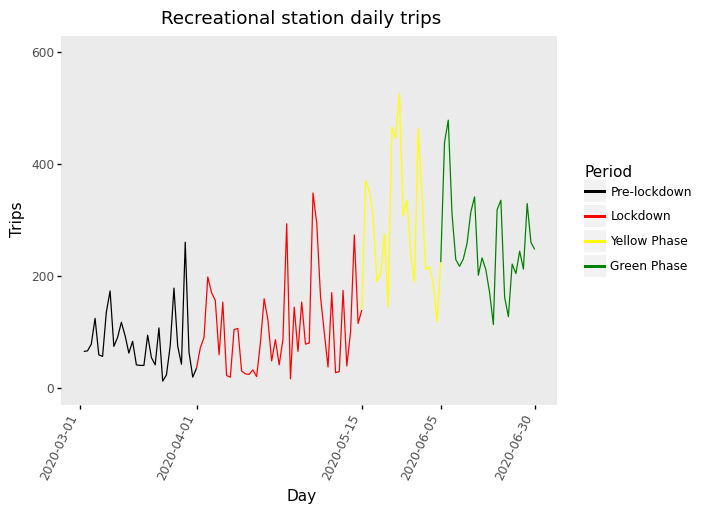

<ggplot: (150544197675)>

In [ ]:
(
ggplot(rec_period) +
    aes(x='Day',y='Trips', group='Period') + geom_line(aes(color='Period'))
    + scale_colour_manual(breaks=("Pre-lockdown","Lockdown","Yellow Phase","Green Phase"), values = ("green", "red", "black", "yellow"))
    + theme(axis_text_x=element_text(rotation=65, hjust=1), panel_grid_minor = element_blank(), panel_grid_major = element_blank())
    + scale_x_date(breaks = ("2020-03-01", "2020-04-01", "2020-05-15","2020-06-05", "2020-06-30")) 
    + ylim(0,600)
    + ggtitle("Recreational station daily trips")
)

## Since we have the code, we can check differences between subscriber and customer, too.

In [ ]:
sub_pandemic = bike_comm.groupby('Day').agg({'Total_sub':'sum'})
sub_pandemic = sub_pandemic.reset_index()
sub_pandemic.columns = ['Day','Subscriber trips']
green1 = (sub_pandemic['Day'] >= pd.Period('2020-03-01', freq='D')) & (sub_pandemic['Day'] <= pd.Period('2020-04-01', freq='D'))
red = (sub_pandemic['Day'] >= pd.Period('2020-04-01', freq='D')) & (sub_pandemic['Day'] <= pd.Period('2020-05-15', freq='D'))
yellow = (sub_pandemic['Day'] >= pd.Period('2020-05-15', freq='D')) & (sub_pandemic['Day'] <= pd.Period('2020-06-05', freq='D'))
green2 = (sub_pandemic['Day'] >= pd.Period('2020-06-05', freq='D')) & (sub_pandemic['Day'] < pd.Period('2020-07-01', freq='D'))
g1 = sub_pandemic.loc[green1]
r = sub_pandemic.loc[red]
y = sub_pandemic.loc[yellow]
g2 = sub_pandemic.loc[green2]
g1['Period'] = 'Pre-lockdown'
r['Period'] = 'Lockdown'
y['Period'] = 'Yellow Phase'
g2['Period'] = 'Green Phase'
sub_period = pd.concat([g1,r,y,g2])
sub_period['Period'] = sub_period['Period'].astype('category')

<ipython-input-67-524c399b63dd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-67-524c399b63dd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-67-524c399b63dd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-67-524c399b63

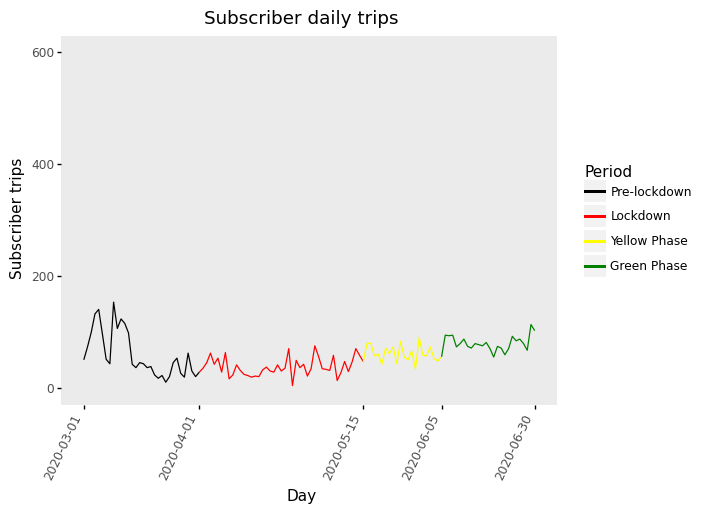

<ggplot: (150545924217)>

In [ ]:
(
ggplot(sub_period) +
    aes(x='Day',y='Subscriber trips', group='Period') + geom_line(aes(color='Period'))
    + scale_colour_manual(breaks=("Pre-lockdown","Lockdown","Yellow Phase","Green Phase"), values = ("green", "red", "black", "yellow"))
    + theme(axis_text_x=element_text(rotation=65, hjust=1), panel_grid_minor = element_blank(), panel_grid_major = element_blank())
    + scale_x_date(breaks = ("2020-03-01", "2020-04-01", "2020-05-15","2020-06-05", "2020-06-30")) 
    + ylim(0,600)
    + ggtitle("Subscriber daily trips")
)

In [ ]:
cust_pandemic = bike_comm.groupby('Day').agg({'Total_cust':'sum'})
cust_pandemic = cust_pandemic.reset_index()
cust_pandemic.columns = ['Day','Customer trips']
green1 = (cust_pandemic['Day'] >= pd.Period('2020-03-01', freq='D')) & (cust_pandemic['Day'] <= pd.Period('2020-04-01', freq='D'))
red = (cust_pandemic['Day'] >= pd.Period('2020-04-01', freq='D')) & (cust_pandemic['Day'] <= pd.Period('2020-05-15', freq='D'))
yellow = (cust_pandemic['Day'] >= pd.Period('2020-05-15', freq='D')) & (cust_pandemic['Day'] <= pd.Period('2020-06-05', freq='D'))
green2 = (cust_pandemic['Day'] >= pd.Period('2020-06-05', freq='D')) & (cust_pandemic['Day'] < pd.Period('2020-07-01', freq='D'))
g1 = cust_pandemic.loc[green1]
r = cust_pandemic.loc[red]
y = cust_pandemic.loc[yellow]
g2 = cust_pandemic.loc[green2]
g1['Period'] = 'Pre-lockdown'
r['Period'] = 'Lockdown'
y['Period'] = 'Yellow Phase'
g2['Period'] = 'Green Phase'
cust_period = pd.concat([g1,r,y,g2])
cust_period['Period'] = cust_period['Period'].astype('category')

<ipython-input-73-1c982404c5ff>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-73-1c982404c5ff>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-73-1c982404c5ff>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-73-1c982404c5

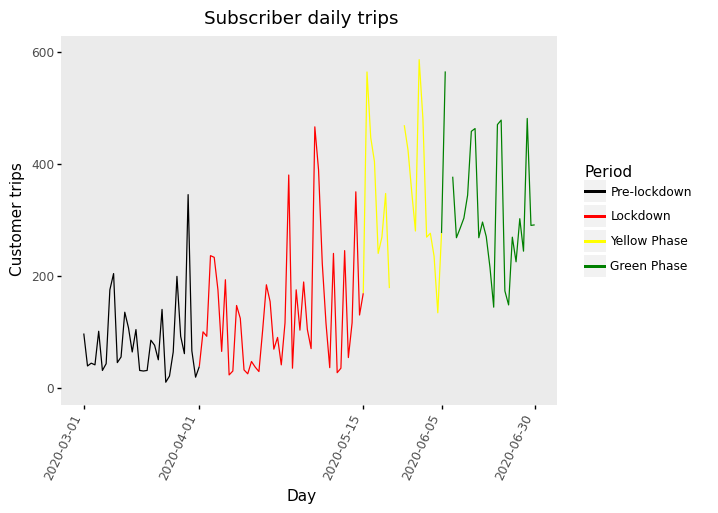

<ggplot: (150539151213)>

In [ ]:
(
ggplot(cust_period) +
    aes(x='Day',y='Customer trips', group='Period') + geom_line(aes(color='Period'))
    + scale_colour_manual(breaks=("Pre-lockdown","Lockdown","Yellow Phase","Green Phase"), values = ("green", "red", "black", "yellow"))
    + theme(axis_text_x=element_text(rotation=65, hjust=1), panel_grid_minor = element_blank(), panel_grid_major = element_blank())
    + scale_x_date(breaks = ("2020-03-01", "2020-04-01", "2020-05-15","2020-06-05", "2020-06-30")) 
    + ylim(0,600)
    + ggtitle("Subscriber daily trips")
)

# The initial analysis shows there is more to understand about bike share use during the lockdown, and since many people are not expecting a vaccine to become widely distributed until well-into 2020, this is worth exploring more.

In [ ]:
bike[bike['From station name'].isin(comm_stations)].agg({'Tripduration':'mean'})

Tripduration    4503.864774
dtype: float64

In [ ]:
bike[bike['From station name'].isin(rec_stations)].agg({'Tripduration':'mean'})

Tripduration    4884.434001
dtype: float64

In [ ]:
import pandas as pd
import numpy as np
import datetime
from plotnine import *

# Bus ridership

The data we are exploring is spread across many tables, which are all made avialable to the public via the **Western Pennsylvania Regional Data Center**. URL links to each of these data source are provided below.

https://data.wprdc.org/dataset/port-authority-monthly-average-ridership-by-route

*The Western Pennsylvania Regional Data Center is managed by the University of Pittsburgh’s Center for Social and Urban Research. While we do not have particular instances of projects using this data, it is certainly drawn upon by researchers and local governmental, private, and other entities.*

**Monthly Port Authority ridership**: The data in this table cover a time period from July 2017 to July 2020, the latter of which is several months into the pandemic. Thus, this data table seems to provide a satisfactory amount of data to establish a "baseline" (before the pandemic) to which we can compare the pandemic-concurrent data.

**Recommendations:**
    We recommend further analysis on average ridership in conjunction with socioeconomic data to ensure equitable and safe route planning as pandemic conditions continue. 
    
Basic findings:
- The most heavily used routes are in commuter hubs (e.g., the busways) and their ridership is still well-below baseline, confirming our initial hypothesis. 
- Certain routes showed inelastic demand - the port authority should drill down into these to see what routes are going to be used regardless of case uptick. Are there ways to ensure their safety, especially?
- Next areas to explore would do more to connect changes in ridership with data about the riders themselves (general or inferred demographics). 

In [ ]:
bus = pd.read_csv('pat_ridership.csv')

In [ ]:
bus.head(5)

,route,ridership_route_code,route_full_name,current_garage,mode,month_start,year_month,day_type,avg_riders,day_count
0,1,001,1 - FREEPORT ROAD,Ross,Bus,2017-01-01,201701,SAT.,970,4
1,4,004,4 - TROY HILL,Ross,Bus,2017-01-01,201701,SAT.,218,4
2,6,006,6 - SPRING HILL,Ross,Bus,2017-01-01,201701,SAT.,496,4
3,8,008,8 - PERRYSVILLE,Ross,Bus,2017-01-01,201701,SAT.,1480,4
4,11,011,11 - FINEVIEW,Ross,Bus,2017-01-01,201701,SAT.,208,4


In [ ]:
bus['day_type'].unique()

array(['SAT.', 'SUN.', 'WEEKDAY'], dtype=object)

## Basic transformations for time variables and simplifying the weekday/weekend column for analysis

In [ ]:
def is_weekend(x):
    if x == 'WEEKDAY':
        return 'Weekday'
    else:
        return 'Weekend'

In [ ]:
bus['yrmn'] = pd.to_datetime(bus['month_start']).dt.to_period('M')
bus['yr'] = bus['yrmn'].dt.year
bus['mn'] = bus['yrmn'].dt.month
bus['week_cat'] = bus['day_type'].apply(lambda x: is_weekend(x))

In [ ]:
bus.head()

,route,ridership_route_code,route_full_name,current_garage,mode,month_start,year_month,day_type,avg_riders,day_count,yrmn,yr,mn,week_cat
0,1,001,1 - FREEPORT ROAD,Ross,Bus,2017-01-01,201701,SAT.,970,4,2017-01,2017,1,Weekend
1,4,004,4 - TROY HILL,Ross,Bus,2017-01-01,201701,SAT.,218,4,2017-01,2017,1,Weekend
2,6,006,6 - SPRING HILL,Ross,Bus,2017-01-01,201701,SAT.,496,4,2017-01,2017,1,Weekend
3,8,008,8 - PERRYSVILLE,Ross,Bus,2017-01-01,201701,SAT.,1480,4,2017-01,2017,1,Weekend
4,11,011,11 - FINEVIEW,Ross,Bus,2017-01-01,201701,SAT.,208,4,2017-01,2017,1,Weekend


## Create a mask to explore just weekday usage and drill down on year-month periods

In [ ]:
mask = (bus['week_cat']=='Weekday') & (bus['yrmn']>pd.Period('2019-07', freq='M'))

<AxesSubplot:xlabel='yrmn'>

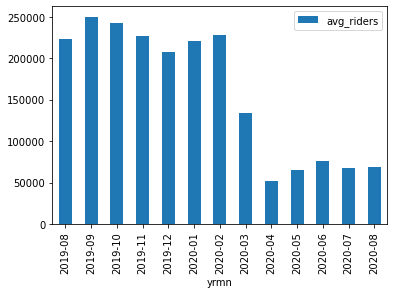

In [ ]:
bus[mask].groupby('yrmn').agg({'avg_riders':'sum'}).plot.bar()

## Port Authority is hurting.

## Further, this appears to confirm our bus **hypothesis**- that ridership has yet to recover

Checking the explicit calculation, we see below that there has been a 71% decrease y-o-y May '19 to May '20

In [ ]:
(
(bus[mask].groupby('yrmn').agg({'avg_riders':'sum'}).loc[pd.Period('2020-05')] - 
bus[mask].groupby('yrmn').agg({'avg_riders':'sum'}).loc[pd.Period('2019-05')] ) /
bus[mask].groupby('yrmn').agg({'avg_riders':'sum'}).loc[pd.Period('2019-05')] 
)

avg_riders   -0.712291
dtype: float64

In [ ]:
# April
(
(bus[mask].groupby('yrmn').agg({'avg_riders':'sum'}).loc[pd.Period('2020-04')] - 
bus[mask].groupby('yrmn').agg({'avg_riders':'sum'}).loc[pd.Period('2019-04')] ) /
bus[mask].groupby('yrmn').agg({'avg_riders':'sum'}).loc[pd.Period('2019-04')] 
)

avg_riders   -0.776445
dtype: float64

In [ ]:
# March
(
(bus[mask].groupby('yrmn').agg({'avg_riders':'sum'}).loc[pd.Period('2020-03')] - 
bus[mask].groupby('yrmn').agg({'avg_riders':'sum'}).loc[pd.Period('2019-03')] ) /
bus[mask].groupby('yrmn').agg({'avg_riders':'sum'}).loc[pd.Period('2019-03')] 
)

avg_riders   -0.405747
dtype: float64

In [ ]:
# View all route names to get a better sense for them
bus['route_full_name'].unique()

array(['1 - FREEPORT ROAD', '4 - TROY HILL', '6 - SPRING HILL',
       '8 - PERRYSVILLE', '11 - FINEVIEW', '12 - MCKNIGHT',
       '13 - BELLEVUE', '14 - OHIO VALLEY', '15 - CHARLES',
       '16 - BRIGHTON', '17 - SHADELAND', '21 - CORAOPOLIS', '22 - MCCOY',
       '24 - WEST PARK', '26 - CHARTIERS', '27 - FAIRYWOOD',
       '28X - AIRPORT FLYER', '31 - BRIDGEVILLE', '38 - GREEN TREE',
       '39 - BROOKLINE', '40 - MOUNT WASHINGTON', '41 - BOWER HILL',
       '43 - BAILEY', '44 - VIA KNOXVILLE', '48 - ARLINGTON',
       '51 - CARRICK', '53 - HOMESTEAD PARK',
       '54 - NORTH SIDE-OAKLAND-SOUTH SIDE', '55 - GLASSPORT',
       '56 - LINCOLN PLACE', '57 - HAZELWOOD', '58 - GREENFIELD',
       '59 - MON VALLEY', '61A - NORTH BRADDOCK',
       '61B - BRADDOCK-SWISSVALE', '61C - MCKEESPORT-HOMESTEAD',
       '61D - MURRAY', '64 - LAWRENCEVILLE - WATERFRONT',
       '67 - MONROEVILLE', '68 - BRADDOCK HILLS', '69 - TRAFFORD',
       '71A - NEGLEY', '71B - HIGHLAND PARK', '71C - POINT BREEZE

## Average weekday ridership by route

In [ ]:
bus[mask].groupby(['route','route_full_name']).agg({'avg_riders':'mean'}).sort_values('avg_riders',ascending=False)[:30]

,,avg_riders
route,route_full_name,
BLSV,BLUE LINE - SOUTH HILLS VILLAGE,8801.142857
P1,P1 - EAST BUSWAY-ALL STOPS,7215.384615
RED,RED - Castle Shannon via Beechview,6740.153846
51,51 - CARRICK,6233.384615
BLLB,BLUE LINE - LIBRARY,6103.000000
BLUE,BLUE - SouthHills Village via Overbrook,5592.769231
61C,61C - MCKEESPORT-HOMESTEAD,4482.692308
71C,71C - POINT BREEZE,3947.000000
71A,71A - NEGLEY,3901.923077


## View usage on the most heavily used routes

In [ ]:
## Dotted lines will show vertical break on when...
## RED: Statewide lockdown announced
## YELLOW: County enters Yellow Phase reopening
## GREEN: County enters Green Phase reopening

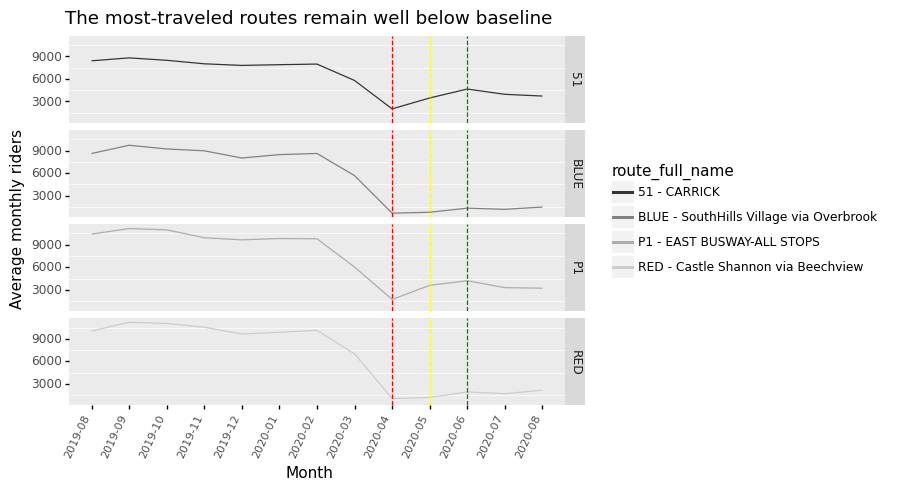

<ggplot: (151329731738)>

In [ ]:
(
ggplot(bus[mask & bus['route'].isin(['RED', 'P1', 'BLUE', '51'])], 
       aes(x = 'yrmn',y='avg_riders', color='route_full_name'))
    + geom_line(group=1)
    + facet_grid('route ~')
    + theme(axis_text_x=element_text(rotation=65, hjust=1, size=8), panel_grid_major=element_blank())
    + labs(x = "Month", y="Average monthly riders",title="The most-traveled routes remain well below baseline", fill="Route")
    + scale_color_grey()
    + geom_vline(xintercept = 9, linetype="dashed", color='red')
    + geom_vline(xintercept = 10, linetype="dashed", color='yellow')
    + geom_vline(xintercept = 11, linetype="dashed", color='green')
)

## Another are to explore was that maybe things are not down across the board. 

### Like with bike, might some stops be more resilient?

Get the data from Mar 2020 onward. Unfortunately, we can't drill down closer than month level for this analysis, but we can look at month-on-month changes

In [ ]:
by_mn = bus[bus['yrmn']>='2020-03'].groupby(['route','route_full_name','yrmn']).agg({'avg_riders':'sum'})
shft1 = by_mn.shift(periods=1)
shft2 = by_mn.shift(periods=2)
shft3 = by_mn.shift(periods=3)

In [ ]:
shft = pd.concat([by_mn, shft1, shft2, shft3], axis=1)
shft.columns = ['actual','1_mn_lag', '2_mn_lag', '3_mn_lag']
shft

actual  1_mn_lag  2_mn_lag  3_mn_lag
route route_full_name      yrmn                                         
1     1 - FREEPORT ROAD    2020-03    2872       NaN       NaN       NaN
                           2020-04    2059    2872.0       NaN       NaN
                           2020-05    2521    2059.0    2872.0       NaN
                           2020-06    2899    2521.0    2059.0    2872.0
                           2020-07    2387    2899.0    2521.0    2059.0
...                                    ...       ...       ...       ...
Y49   Y49 - PROSPECT FLYER 2020-04    1157    1668.0     744.0     706.0
                           2020-05    1428    1157.0    1668.0     744.0
                           2020-06    1438    1428.0    1157.0    1668.0
                           2020-07    1270    1438.0    1428.0    1157.0
                           2020-08    1236    1270.0    1438.0    1428.0

[601 rows x 4 columns]

Compute % change columns using the shifted data

In [ ]:
shft['one']=(shft['actual']-shft['1_mn_lag'])/shft['1_mn_lag']
shft['two']=(shft['actual']-shft['2_mn_lag'])/shft['2_mn_lag']
shft['three']=(shft['actual']-shft['3_mn_lag'])/shft['3_mn_lag']
shft = shft.reset_index()
shft

,route,route_full_name,yrmn,actual,1_mn_lag,2_mn_lag,3_mn_lag,one,two,three
0,1,1 - FREEPORT ROAD,2020-03,2872,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1 - FREEPORT ROAD,2020-04,2059,2872.0,NaN,NaN,-0.283078,NaN,NaN
2,1,1 - FREEPORT ROAD,2020-05,2521,2059.0,2872.0,NaN,0.224381,-0.122214,NaN
3,1,1 - FREEPORT ROAD,2020-06,2899,2521.0,2059.0,2872.0,0.149940,0.407965,0.009401
4,1,1 - FREEPORT ROAD,2020-07,2387,2899.0,2521.0,2059.0,-0.176613,-0.053154,0.159301
...,...,...,...,...,...,...,...,...,...,...
596,Y49,Y49 - PROSPECT FLYER,2020-04,1157,1668.0,744.0,706.0,-0.306355,0.555108,0.638810
597,Y49,Y49 - PROSPECT FLYER,2020-05,1428,1157.0,1668.0,744.0,0.234226,-0.143885,0.919355
598,Y49,Y49 - PROSPECT FLYER,2020-06,1438,1428.0,1157.0,1668.0,0.007003,0.242869,-0.137890
599,Y49,Y49 - PROSPECT FLYER,2020-07,1270,1438.0,1428.0,1157.0,-0.116829,-0.110644,0.097666


### We are interested in the most resilient routes, i.e., those with the biggest increase (or smallest decrease) in % change

In [ ]:
top4 = shft[(shft['yrmn']=='2020-06') & (shft['3_mn_lag']>1000)].sort_values(by='three', ascending=False)[:7]
top4

,route,route_full_name,yrmn,actual,1_mn_lag,2_mn_lag,3_mn_lag,one,two,three
526,P68,P68 - BRADDOCK HILLS FLYER,2020-06,1187,1419.0,1121.0,1036.0,-0.163495,0.058876,0.145753
448,MI,MONONGAHELA INCLINE,2020-06,1800,610.0,315.0,1727.0,1.950820,4.714286,0.042270
213,55,55 - GLASSPORT,2020-06,2085,2307.0,1963.0,2009.0,-0.096229,0.062150,0.037830
237,59,59 - MON VALLEY,2020-06,4122,4506.0,3728.0,4004.0,-0.085220,0.105687,0.029471
3,1,1 - FREEPORT ROAD,2020-06,2899,2521.0,2059.0,2872.0,0.149940,0.407965,0.009401
93,26,26 - CHARTIERS,2020-06,1299,1207.0,1009.0,1295.0,0.076222,0.287413,0.003089
15,12,12 - MCKNIGHT,2020-06,2193,1595.0,1249.0,2214.0,0.374922,0.755805,-0.009485


### Same for the biggest decreases

In [ ]:
bottom4 = shft[(shft['yrmn']=='2020-06') & (shft['3_mn_lag']>1000)].sort_values(by='three')[:3]
bottom4

,route,route_full_name,yrmn,actual,1_mn_lag,2_mn_lag,3_mn_lag,one,two,three
424,BLUE,BLUE - SouthHills Village via Overbrook,2020-06,1880,1188.0,941.0,6735.0,0.582492,0.997875,-0.720861
568,SLVR,SLVR - Libary via Overbrook,2020-06,1775,1142.0,923.0,5495.0,0.554291,0.923077,-0.676979
514,P3,P3 - EAST BUSWAY-OAKLAND,2020-06,602,501.0,521.0,1775.0,0.201597,0.155470,-0.660845


In [ ]:
shft[shft['route']=='P3']

,route,route_full_name,yrmn,actual,1_mn_lag,2_mn_lag,3_mn_lag,one,two,three
511,P3,P3 - EAST BUSWAY-OAKLAND,2020-03,1775,63.0,0.0,0.0,27.174603,inf,inf
512,P3,P3 - EAST BUSWAY-OAKLAND,2020-04,521,1775.0,63.0,0.0,-0.706479,7.269841,inf
513,P3,P3 - EAST BUSWAY-OAKLAND,2020-05,501,521.0,1775.0,63.0,-0.038388,-0.717746,6.952381
514,P3,P3 - EAST BUSWAY-OAKLAND,2020-06,602,501.0,521.0,1775.0,0.201597,0.155470,-0.660845
515,P3,P3 - EAST BUSWAY-OAKLAND,2020-07,652,602.0,501.0,521.0,0.083056,0.301397,0.251440
516,P3,P3 - EAST BUSWAY-OAKLAND,2020-08,752,652.0,602.0,501.0,0.153374,0.249169,0.500998


**NOTE:** We will exclude the Incline to focus on bus routes for our "most resilient" group

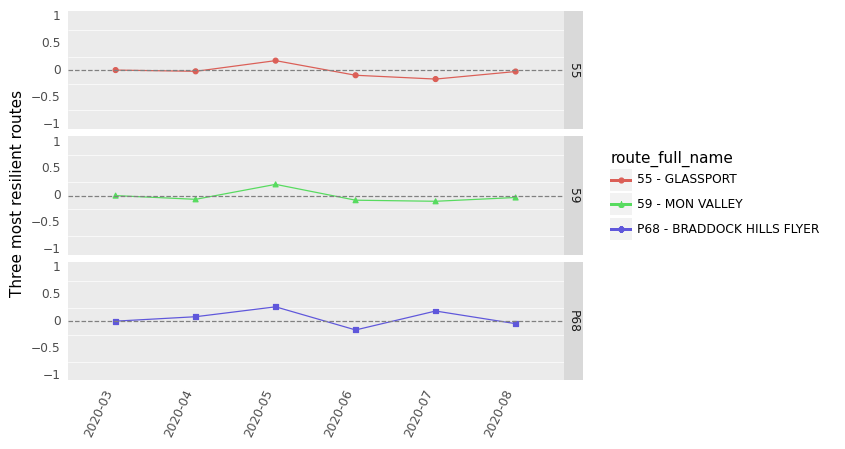

<ggplot: (140332059959)>

In [ ]:
# This will change the "top" group data by pegging Mar 2020 at 0 on 
# the graphs (otherwise, the point at Mar 2020 would represent change from previous)
gg_top = shft[shft['route'].isin(['P68','55','59'])]
ggt = gg_top.set_index('yrmn')
ggt.at['2020-03', 'one'] = 0
gg_top = ggt.reset_index()
(
ggplot(gg_top, aes(x='yrmn', y = 'one', color='route_full_name', shape='route_full_name'))
    + geom_line(group=1) + geom_point(stat = "identity") + facet_grid('route ~') 
    + ylim(-1,1)
    + geom_hline(yintercept = 0, linetype="dashed", color='grey')
    + theme(axis_text_x = element_text(angle = 65, hjust=1), axis_ticks = element_blank(),panel_grid_major=element_blank())
    + labs( x = None, y = "Three most resilient routes")
)

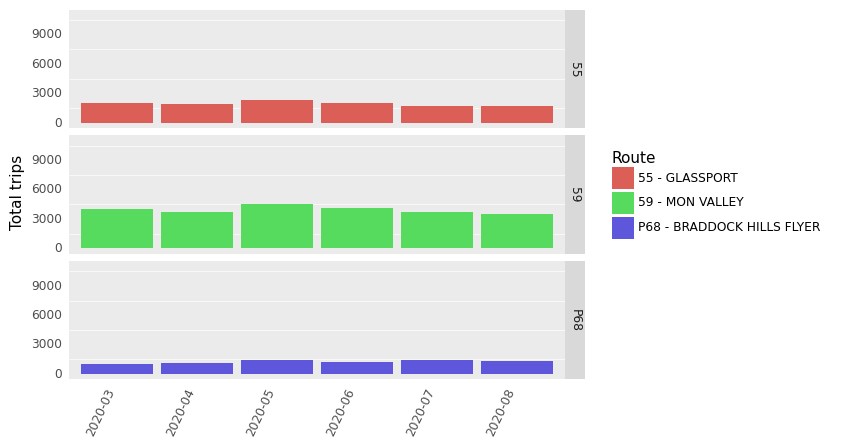

<ggplot: (140331923598)>

In [ ]:
gg_top = shft[shft['route'].isin(['P68','55','59'])]
(
ggplot(gg_top, aes(x='yrmn', y = 'actual', fill='route_full_name', shape='route_full_name'))
    + geom_bar(stat = "identity") + facet_grid('route ~')
    + ylim(0,11000)
    + theme(axis_text_x = element_text(angle = 65, hjust=1), axis_ticks = element_blank(),panel_grid_major=element_blank())
    + labs( x = None, y = "Total trips", fill = "Route")
)

In [ ]:
# This will change the "bottom" group data by pegging Mar 2020 at 0 on 
# the graphs (otherwise, the point at Mar 2020 would represent change from previous)
gg_bottom = shft[shft['route'].isin(bottom4['route'])]
ggb = gg_bottom.set_index('yrmn')
ggb.at['2020-03', 'one'] = 0
gg_bottom = ggb.reset_index()

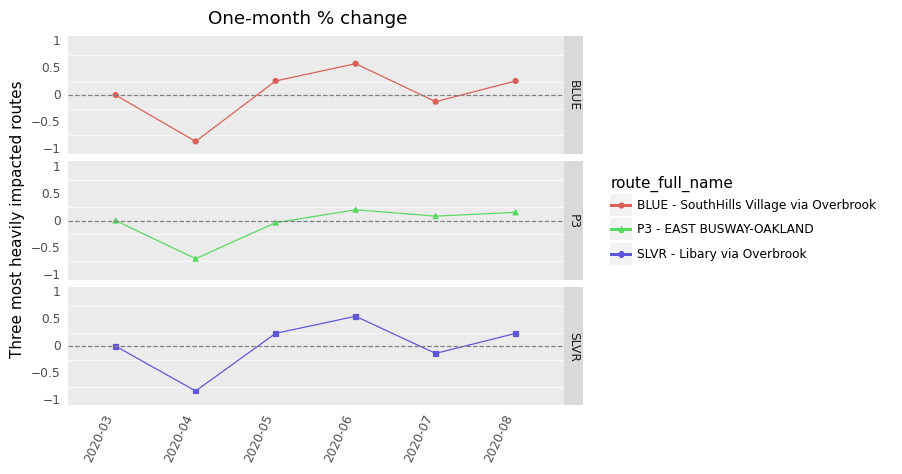

<ggplot: (140332792342)>

In [ ]:
gg_bottom = shft[shft['route'].isin(bottom4['route'])]
ggb = gg_bottom.set_index('yrmn')
ggb.at['2020-03', 'one'] = 0
gg_bottom = ggb.reset_index()
(
ggplot(gg_bottom, aes(x='yrmn', y = 'one', color='route_full_name', shape='route_full_name'))
    + geom_line(group=1) + geom_point(stat = "identity") + facet_grid('route ~')
    + ylim(-1,1)
    + geom_hline(yintercept = 0, linetype="dashed", color='grey')
    + theme(axis_text_x = element_text(angle = 65, hjust=1), axis_ticks = element_blank(),panel_grid_major=element_blank())
    + labs( x = None, y = "Three most heavily impacted routes", title = "One-month % change")
)

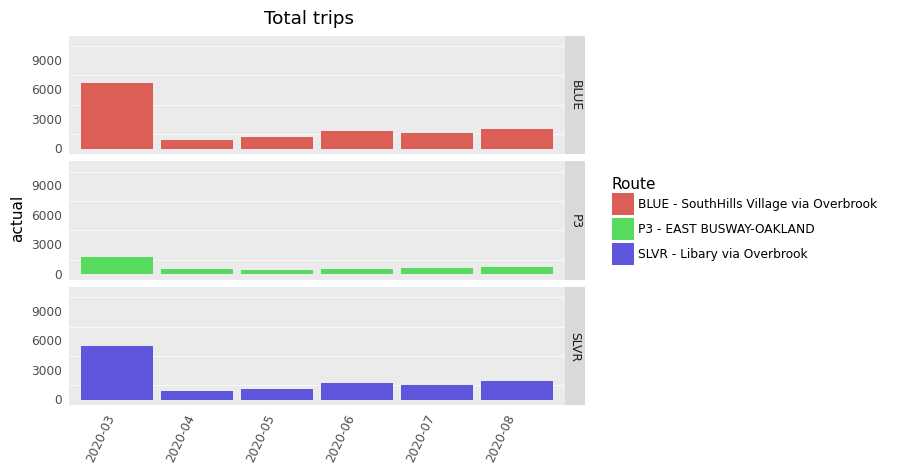

<ggplot: (140332504510)>

In [ ]:
gg_bottom = shft[shft['route'].isin(bottom4['route'])]
(
ggplot(gg_bottom, aes(x='yrmn', y = 'actual', fill='route_full_name', shape='route_full_name'))
    + geom_bar(stat = "identity") + facet_grid('route ~')
    + ylim(0,11000)
    + theme(axis_text_x = element_text(angle = 65, hjust=1), axis_ticks = element_blank(),panel_grid_major=element_blank())
    + labs( x =  None, title = "Total trips", fill = "Route")
)

## We see that some routes haven't lost ridership. These are important to identify because they will be carrying people regardless of an uptick in cases, perhaps. 

Further, though we only scrtached the surface here, we could look at income and other socioeconomic and demographic factors to know the kind of people who must still use such routes. 

https://www.opportunityatlas.org/

Opportunity Atlas above is a great and easy source to visualize income data by area. Census also has such tools. 


# Imports

In [ ]:
import pandas as pd
import numpy as np
import datetime
from plotnine import *

# Traffic count data

The data we are exploring is spread across many tables, which are all made avialable to the public via the **Western Pennsylvania Regional Data Center**. URL links to each of these data source are provided below.

https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh/resource/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167

*The Western Pennsylvania Regional Data Center is managed by the University of Pittsburgh’s Center for Social and Urban Research. While we do not have particular instances of projects using this data, it is certainly drawn upon by researchers and local governmental, private, and other entities.*

**Recommendations:**
    None
    
Basic findings:
- Unfortunately, the traffic data was too sparse for the purposes of our analysis. We leave this initial exploration to show why we decided to focus on public transit and decided to pass for now on looking for traffic reductions and any impact oj air quality.  

## Cleaning

In [ ]:
traf = pd.read_csv('traffic_count_2.csv')
len(traf)

291

In [ ]:
# Change dates to datetime and get some periods like Year_Month
traf['count_start_date'] = pd.to_datetime(traf['count_start_date'])
traf['count_end_date'] = pd.to_datetime(traf['count_end_date'])
traf['count_days'] = traf['count_end_date'] - traf['count_start_date']
traf['yrmn'] = traf['count_end_date'].dt.to_period('M')
traf['wk'] = traf['count_end_date'].dt.to_period('W-SUN')

In [ ]:
by_nh = traf.groupby(['neighborhood','yrmn']).agg({'yrmn':'count'})[:20]
by_nh.columns = ['n']
by_nh = by_nh.sort_values(by = ['neighborhood','yrmn'])

<AxesSubplot:xlabel='None,yrmn'>

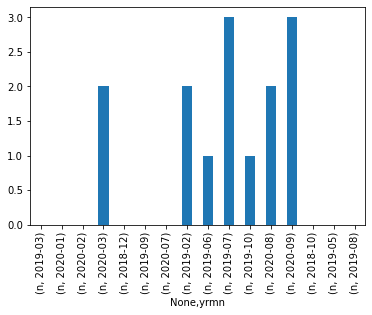

In [ ]:
by_nh.unstack([1]).loc['Bloomfield'].plot.bar()

## Unfortunately, the traffic data are pretty sparse, and counts aren't always overlapping within neighborhoods to get good year-on-year changes at month level, so I'll add Quarters and group by some higher order areas, like Wards

In [ ]:
traf['qtr'] = traf['count_end_date'].dt.to_period('Q')
traf.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,ward,tract,public_works_division,pli_division,police_zone,fire_zone,count_days,yrmn,wk,qtr
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,6,42003060500,6,6,2,2-6,8 days,2019-04,2019-04-22/2019-04-28,2019Q2
1,1026101993,140,1.121444e+09,2019-01-24,NaT,NaN,NaN,NaN,Intersection Study,NaN,...,9,42003090200,2,9,2,3-6,NaT,NaT,NaT,NaT
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,28,42003563000,5,28,6,1-16,7 days,2018-09,2018-09-03/2018-09-09,2018Q3
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,14,42003140800,3,14,4,2-18,15 days,2018-08,2018-07-30/2018-08-05,2018Q3
4,1039546167,144,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,26,42003260200,1,26,1,1-15,NaT,NaT,NaT,NaT


In [ ]:
#car_traf = traf.groupby(['neighborhood', 'device_id', 'YrMn']).agg({'average_daily_car_traffic':'mean'})
car_traf = traf.groupby(['ward','qtr']).agg({'average_daily_car_traffic':'mean'})

In [ ]:
car_traf.unstack([1]).head(10)

average_daily_car_traffic                                             \
qtr                     2018Q2       2018Q3  2018Q4   2019Q1       2019Q2   
ward                                                                        
1                          NaN          NaN     NaN  1917.50          NaN   
2                          NaN          NaN     NaN  6443.00          NaN   
4                          NaN          NaN  1981.0      NaN          NaN   
5                          NaN          NaN   927.0      NaN          NaN   
6                          NaN          NaN   768.0      NaN  4542.333333   
7                          NaN          NaN     NaN  6326.00          NaN   
8                          NaN          NaN     NaN  4115.50  2859.000000   
9                          NaN          NaN     NaN  2286.25          NaN   
10                         NaN          NaN  2138.5      NaN  1231.000000   
11                         NaN  7140.666667     NaN  7611.00          NaN   

                                                   
qtr    2019Q3       2019Q4  2020Q1  2020Q3 2020Q4  
ward                                               
1         NaN          NaN     NaN     NaN    NaN  
2         NaN          NaN     NaN     NaN    NaN  
4         NaN  4163.000000     NaN  8112.0    NaN  
5     7579.00  1530.000000     NaN     NaN  403.0  
6         NaN  1049.000000  3131.0     NaN  450.0  
7     4354.00   598.333333     NaN     NaN    NaN  
8     9469.75   867.000000     NaN   589.2    NaN  
9         NaN          NaN     NaN    77.0    NaN  
10        NaN  4068.000000     NaN     NaN    NaN  
11    1554.25  1235.333333     NaN   972.0   58.0

In [ ]:
# Simplify dataset for a ggplot in future
gg_traf = car_traf.reset_index()
gg_traf['ward'] = gg_traf['ward'].astype('category')
gg_traf.head(10)

,ward,qtr,average_daily_car_traffic
0,1,2018Q4,NaN
1,1,2019Q1,1917.5
2,2,2019Q1,6443.0
3,4,2018Q4,1981.0
4,4,2019Q2,NaN
5,4,2019Q4,4163.0
6,4,2020Q3,8112.0
7,5,2018Q4,927.0
8,5,2019Q3,7579.0
9,5,2019Q4,1530.0


In [ ]:
gg_traf.groupby('ward').size().sort_values(ascending=False)[:9]

ward
14    8
8     6
19    6
11    6
29    5
6     5
4     4
5     4
22    4
dtype: int64

In [ ]:
# top ward counts
list(gg_traf.groupby('ward').size().sort_values(ascending=False)[:5].index)

[14, 8, 19, 11, 29]

## Looks like Ward 14 has several counts to consider... 

<AxesSubplot:xlabel='None,qtr'>

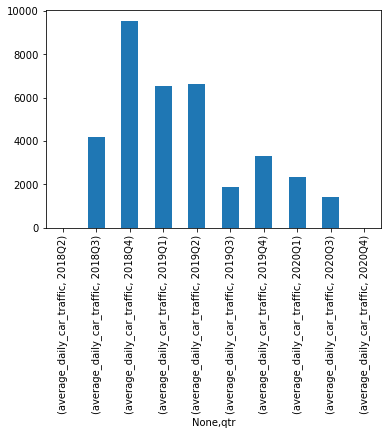

In [ ]:
# Wards 14, 19 and 8 have visible drop offs.
car_traf.unstack([1]).loc[14].plot.bar()

In [ ]:
df = gg_traf[gg_traf['qtr']>=pd.Period('2019-01', freq='Q')]
df.head()

,ward,qtr,average_daily_car_traffic
1,1,2019Q1,1917.5
2,2,2019Q1,6443.0
4,4,2019Q2,NaN
5,4,2019Q4,4163.0
6,4,2020Q3,8112.0


In [ ]:
mask = (gg_traf['ward'].isin([14, 8, 19]) & (gg_traf['qtr']>=pd.Period('2019-01', freq='Q')))

C:\Users\danie\anaconda_3\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.


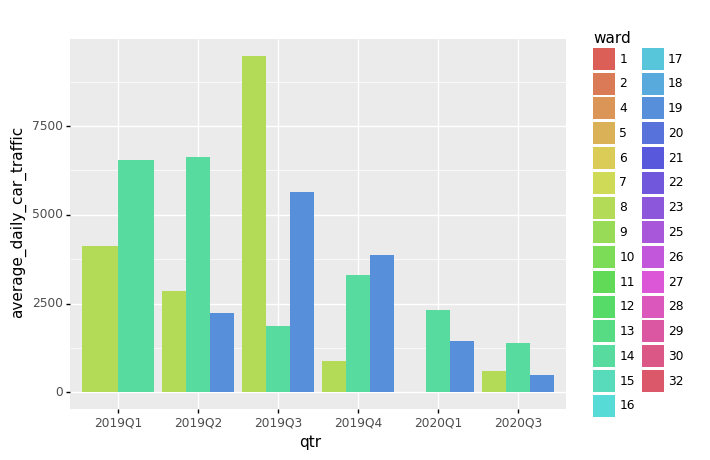

<ggplot: (86298271955)>

In [ ]:
(
ggplot(gg_traf[mask],
       aes(x='qtr', y='average_daily_car_traffic', fill='ward')) 
    + geom_bar(stat = 'identity', position='dodge')
)


# Air data

In [ ]:
air = pd.read_csv('air_qual.csv')

C:\Users\danie\anaconda_3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71) have mixed types.Specify dtype option on import or set low_memory=False.


In [ ]:
len(air)

569380

In [ ]:
air.head()

,site,datetime,bcstat,bcstat_txt,black_carbon,black_carbon_txt,bp,bp_txt,co,co_txt,...,sonicws,sonicws_txt,uvpm,uvpm_txt,rainfall,rainfall_txt,solarrad,solarrad_txt,uv_rad,uv_rad_txt
0,Avalon,2016-01-30T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Avalon,2016-01-15T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Avalon,2016-01-15T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Avalon,2016-01-15T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avalon,2016-01-15T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
air.columns

Index(['site', 'datetime', 'bcstat', 'bcstat_txt', 'black_carbon',
       'black_carbon_txt', 'bp', 'bp_txt', 'co', 'co_txt', 'h2s', 'h2s_txt',
       'int_t', 'int_t_txt', 'no', 'no_txt', 'no2', 'no2_txt', 'nox',
       'nox_txt', 'noy', 'noy_txt', 'noydif', 'noydif_txt', 'out_rh',
       'out_rh_txt', 'out_t', 'out_t_txt', 'ozone', 'ozone_txt', 'ozone2',
       'ozone2_txt', 'per_f', 'per_f_txt', 'per_f2', 'per_f2_txt', 'pm10',
       'pm10_txt', 'pm10_fl', 'pm10_fl_txt', 'pm10b', 'pm10b_txt', 'pm25',
       'pm25_txt', 'pm25(2)', 'pm25(2)_txt', 'pm25_fl', 'pm25_fl_txt', 'pm25b',
       'pm25b_txt', 'pm25t', 'pm25t_txt', 'rwd', 'rwd_txt', 'rws', 'rws_txt',
       'sigtheta', 'sigtheta_txt', 'so2', 'so2_txt', 'sonicwd', 'sonicwd_txt',
       'sonicws', 'sonicws_txt', 'uvpm', 'uvpm_txt', 'rainfall',
       'rainfall_txt', 'solarrad', 'solarrad_txt', 'uv_rad', 'uv_rad_txt'],
      dtype='object')

In [ ]:
air.dtypes

site                    object
datetime        datetime64[ns]
bcstat                 float64
bcstat_txt              object
black_carbon           float64
                     ...      
rainfall_txt            object
solarrad               float64
solarrad_txt            object
uv_rad                 float64
uv_rad_txt              object
Length: 72, dtype: object

In [ ]:
air['datetime'] = pd.to_datetime(air['datetime'])

In [ ]:
air['yrmn'] = air['datetime'].dt.to_period('M')

In [ ]:
air[air['yrmn']>pd.Period('2019-02')].groupby(['site','yrmn']).mean()

bcstat  black_carbon  bp  co       h2s      int_t  no  \
site         yrmn                                                             
Avalon       2019-03     NaN           NaN NaN NaN  0.000056  22.183558 NaN   
             2019-04     NaN           NaN NaN NaN  0.000015  22.916134 NaN   
             2019-05     NaN           NaN NaN NaN  0.000003  22.195553 NaN   
             2019-06     NaN           NaN NaN NaN  0.000003  21.872106 NaN   
             2019-07     NaN           NaN NaN NaN  0.000000  21.691644 NaN   
...                      ...           ...  ..  ..       ...        ...  ..   
West Mifflin 2019-08     NaN           NaN NaN NaN       NaN        NaN NaN   
             2019-09     NaN           NaN NaN NaN       NaN        NaN NaN   
             2019-10     NaN           NaN NaN NaN       NaN        NaN NaN   
             2019-11     NaN           NaN NaN NaN       NaN        NaN NaN   
             2019-12     NaN           NaN NaN NaN       NaN        NaN NaN   

                      no2  nox  noy  ...  rwd  rws   sigtheta       so2  \
site         yrmn                    ...                                  
Avalon       2019-03  NaN  NaN  NaN  ...  NaN  NaN  33.461051  0.000258   
             2019-04  NaN  NaN  NaN  ...  NaN  NaN  35.749928  0.000080   
             2019-05  NaN  NaN  NaN  ...  NaN  NaN  38.750806  0.000026   
             2019-06  NaN  NaN  NaN  ...  NaN  NaN  40.456764  0.000011   
             2019-07  NaN  NaN  NaN  ...  NaN  NaN  42.674560  0.000003   
...                   ...  ...  ...  ...  ...  ...        ...       ...   
West Mifflin 2019-08  NaN  NaN  NaN  ...  NaN  NaN        NaN  0.000745   
             2019-09  NaN  NaN  NaN  ...  NaN  NaN        NaN  0.000892   
             2019-10  NaN  NaN  NaN  ...  NaN  NaN        NaN  0.000605   
             2019-11  NaN  NaN  NaN  ...  NaN  NaN        NaN  0.000762   
             2019-12  NaN  NaN  NaN  ...  NaN  NaN        NaN  0.000190   

                         sonicwd   sonicws  uvpm  rainfall  solarrad  uv_rad  
site         yrmn                                                             
Avalon       2019-03  218.685484  4.686425   NaN       NaN       NaN     NaN  
             2019-04  201.606322  4.331322   NaN       NaN       NaN     NaN  
             2019-05  213.368280  4.189651   NaN       NaN       NaN     NaN  
             2019-06  199.147222  4.226389   NaN       NaN       NaN     NaN  
             2019-07  205.475101  3.258143   NaN       NaN       NaN     NaN  
...                          ...       ...   ...       ...       ...     ...  
West Mifflin 2019-08         NaN       NaN   NaN       NaN       NaN     NaN  
             2019-09         NaN       NaN   NaN       NaN       NaN     NaN  
             2019-10         NaN       NaN   NaN       NaN       NaN     NaN  
             2019-11         NaN       NaN   NaN       NaN       NaN     NaN  
             2019-12         NaN       NaN   NaN       NaN       NaN     NaN  

[260 rows x 35 columns]